# badのデータ
[TODO]
- 利用形態（トランジットかどうかとか）で集計
- 月で集計

In [2]:
library(dplyr)
library(lda)
library(stringr)
library(ggplot2)
library(gridExtra)
library(pforeach)
library(slackr)
slackr_setup()
source('/Users/kosuke/研究/code/nikkei/LDA.R')
options(warn=-1)

In [3]:
data <- read.csv("/Users/kosuke/研究/code/airport/airport_review_complete.csv", stringsAsFactors=F)
review <- read.csv("/Users/kosuke/研究/code/airport/morphed_text.csv", stringsAsFactors=F)
lcc <- read.csv("/Users/kosuke/研究/code/airport/airport_lcc.csv")
data$month <- months(as.Date(apply(as.data.frame(data$datetime), 1, get_monthly)))
data$yymm <- as.Date(apply(as.data.frame(data$datetime), 1, get_monthly))
data$year <- as.Date(apply(as.data.frame(data$datetime), 1, get_year))
data$review <- review
target_data <- data[data$yymm >= '2012-01-01',]
target_review <- target_data$review

In [4]:
nonrec_target_data <- target_data[target_data$Recommend != "yes",]
nonrec_target_review <- nonrec_target_data$review

## LDAの実行

In [5]:
bow <- lexicalize(nonrec_target_review$text)
word_count <- word.counts(bow$documents)
vocab <- bow$vocab[word_count > 0]
doc <- lexicalize(nonrec_target_review$text, vocab = vocab)

#### 語彙数

In [81]:
length(vocab)

[1] 10520

#### 総単語数

In [89]:
sum(sapply(doc, ncol))

[1] 244508

In [90]:
sum(sapply(doc, ncol)) / length(doc)

[1] 52.87803

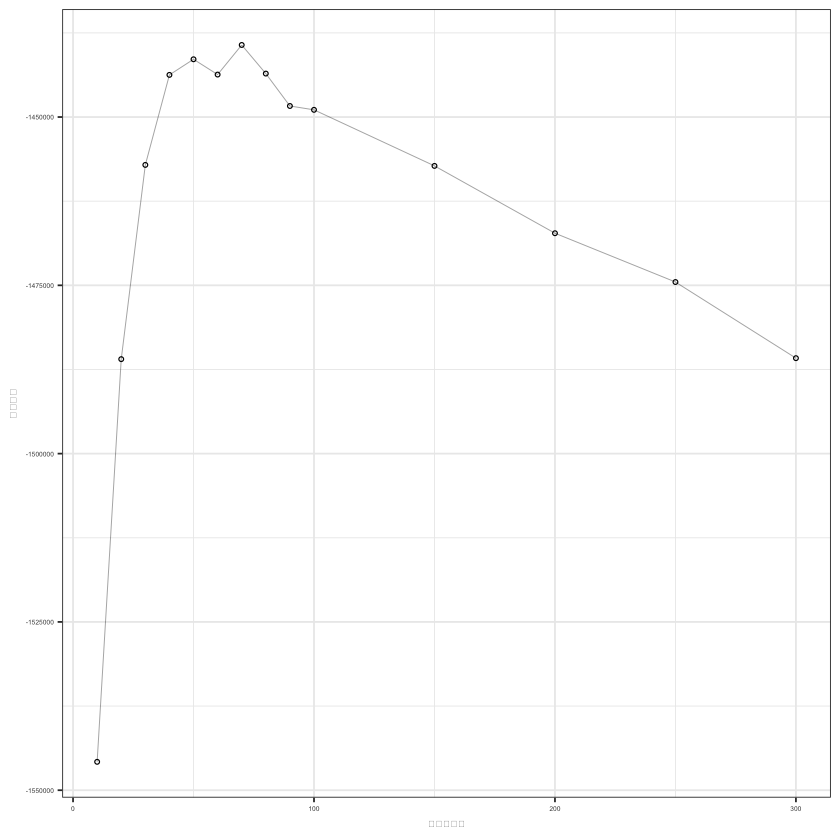

In [190]:
gg_loglik <- function(result, K){
	p = ggplot(data.frame(result), aes(x = K, y = result))
	p = p + geom_line(size=0.1)
    p = p + geom_point(shape=1, size=1)
	p = p + xlab("トピック数") + ylab("周辺尤度")
	p = p + theme_bw()
    p <- p + theme(
            axis.title.x = element_text(size = 6),
            axis.title.y = element_text(size = 6),
            axis.text.x = element_text(size = 4),
            axis.text.y = element_text(size = 4))
   p
   
}
gg_loglik(result, K)

In [189]:
gg_loglik(result, K)

     user    system   elapsed 
26581.725    57.497 18743.314 

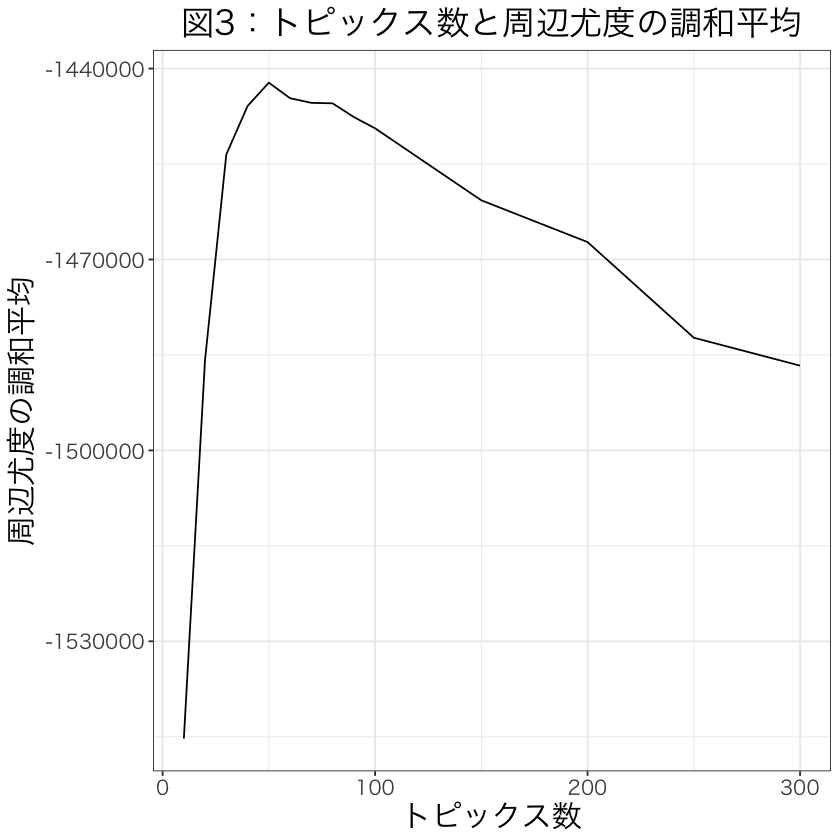

In [10]:
t = proc.time()
result <- pforeach(K = c(seq(10,100, by=10), 150, 200, 250, 300))({
		loglik_LDA(doc, vocab, K, iter=4000)
		})
proc.time()-t
K = c(seq(10,100, by=10), 150, 200, 250, 300)
gg_loglik(result, K)

     user    system   elapsed 
13687.123    59.402 10130.746 

ERROR: Error in eval(expr, envir, enclos):  関数 "text_slack" を見つけることができませんでした 


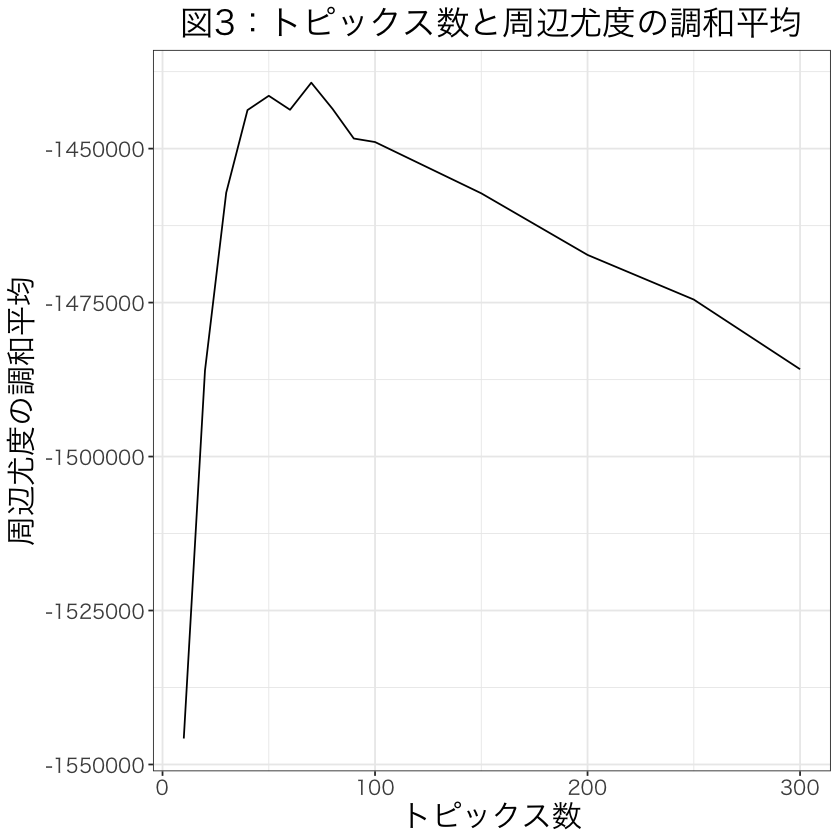

In [18]:
t = proc.time()
result <- pforeach(K = c(seq(10,100, by=10), 150, 200, 250, 300), .seed=123)({
		loglik_LDA(doc, vocab, K, iter=2000)
		})
proc.time()-t
K = c(seq(10,100, by=10), 150, 200, 250, 300)
gg_loglik(result, K)
text_slack("学習しゅーりょー")

    user   system  elapsed 
5309.290   12.071 3678.983 

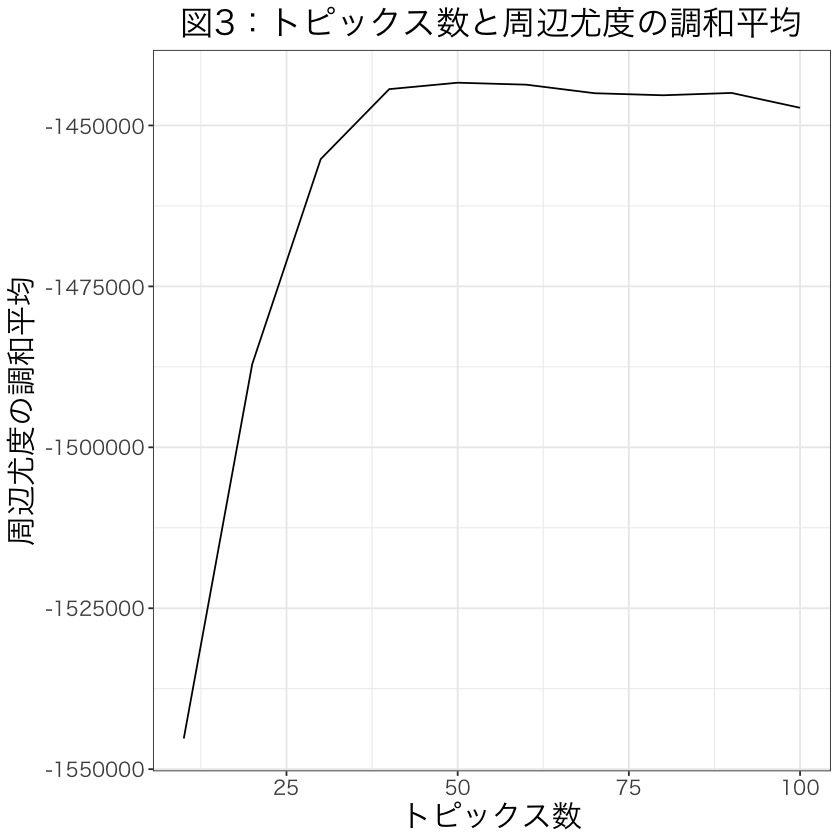

In [14]:
t = proc.time()
result <- pforeach(K = c(seq(10,100, by=10)))({
		loglik_LDA(doc, vocab, K, iter=2000)
		})
proc.time()-t
K = c(seq(10,100, by=10))
gg_loglik(result, K)

## トピック数40


In [ ]:
t <- proc.time()
k = 40
set.seed(123)
result2 <- lda.collapsed.gibbs.sampler(doc, 
                                       k,
                                       vocab,
                                       2000,  # 繰り返し数
                                       0.1, # ディリクレ過程のハイパーパラメータα
                                       0.1, # ディリクレ過程のハイパーパラメータη
                                       compute.log.likelihood=TRUE)
proc.time() - t

## 結果の解釈

In [119]:
top.words <- top.topic.words(result2$topics, 50, by.score=T)

In [135]:
top.words[,valid[1:20]]

[,1]     [,2]       [,3]         [,4]        [,5]          [,6]        
 [1,] car      passport   terminal     staff       international water       
 [2,] parking  control    taxi         airport     domestic      free        
 [3,] rental   line       arrival      rude        terminal      duty        
 [4,] park     eu         immigration  avoid       transfer      bottle      
 [5,] pick     people     departure    bad         flight        buy         
 [6,] drive    border     get          english     new           purchase    
 [7,] airport  staff      check-in     security    airline       shop        
 [8,] lane     uk         take         unhelpful   jet           security    
 [9,] lot      get        baggage      experience  least         fountain    
[10,] traffic  minute     building     speak       australia     confiscate  
[11,] road     long       hall         unfriendly  shuttle       bag         
[12,] exit     desk       last         line        traveller     drinking    
[13,] area     arrive     total        poor        see           drink       
[14,] drop     terminal   minute       help        mosquito      liquid      
[15,] hire     officer    low          cost        sign          expensive   
[16,] charge   hour       bad          horrible    qantas        transit     
[17,] stop     passenger  outside      transfer    safety        allow       
[18,] day      holder     city         terrible    positive      go          
[19,] shuttle  bad        driver       signage     indian        plane       
[20,] return   take       air          dirty       one           area        
[21,] mess     machine    look         awful       rude          employee    
[22,] collect  poor       work         information word          clear       
[23,] runway   experience area         ground      usa           seal        
[24,] extra    nothing    whole        transit     worth         wine        
[25,] circle   slow       old          find        brisbane      fill        
[26,] pick-up  see        meter        good        depart        personal    
[27,] rent     non-eu     dreadful     possible    area          receipt     
[28,] location hall       non          place       manage        liquor      
[29,] call     crowd      chaos        long        difficult     perfume     
[30,] garage   disgrace   lcct         europe      story         washroom    
[31,] level    electronic departures   many        number        sealed      
[32,] fee      work       none         surly       busy          alcohol     
[33,] daughter more       fly          language    experience    staff       
[34,] vehicle  booth      pal          helpful     melbourne     item        
[35,] pay      system     arrive       slow        board         throw       
[36,] entrance country    arrivals     service     zealand       flight      
[37,] sign     north      min          recommend   smooth        bottled     
[38,] side     huge       month        travel      tokyo         couple      
[39,] keep     official   existent     world       problem       checkpoint  
[40,] trolley  seem       pacific      traveller   mean          bring       
[41,] company  hundred    new          wifi        common        small       
[42,] signage  police     authority    thing       responsible   shoulder    
[43,] middle   reach      conditioning joke        addition      middle      
[44,] update   allow      ticket       try         india         attention   
[45,] congest  process    landing      passenger   arrangement   collect     
[46,] previous use        day          turkish     corridor      end         
[47,] watch    clear      imagine      french      other         short       
[48,] non      wait       national     care        doubt         disappointed
[49,] driver   duty       exit         overcrowd   severe        sign        
[50,] dreadful massive    construction different   beg           signpost    
      [,7]       [,8]       

In [137]:
valid <- c(1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 20, 21, 22, 24, 25, 26, 27, 29, 30, 34, 35, 36, 37, 38)
topic_name <- c("車",
                "入国審査列",
                "タクシー",
                "スタッフの役立ちさ",
                "トランジット",
                "飲み物",
                "セキュリティ",
                "トイレ",
                "遅延",
                "ターミナル内移動",
                "電子機器",
                "子供",
                "荷物受け取り",
                "飲食",
                "ラグジュアリー",
                "入国審査列2",
                "案内",
                "ターミナル宿泊",
                "スタッフの態度",
                "セキュリティチェック列",
                "ターミナル間移動",
                "スタッフへの問い合わせ",
                "チェックイン列",
                "ユニバーサルデザイン",
                "家族",
                "陸上交通",
                "気温"
                )

#### 使えそうなトピック

In [141]:
useful_topic <- top.words[1:20, valid]
colnames(useful_topic) <- topic_name
useful_topic
output <- data.frame(words=apply(useful_topic[1:10,c(1, 10, 18, 24, 23, 7, 13, 20, 15, 22, 5, 6, 11, 2, 26, 21, 16, 8, 4, 9, 19, 3, 12, 14, 17, 25, 27)], 2, paste, collapse=", "))
write.csv(output, "bad_top_words.csv", fileEncoding="cp932")

車      入国審査列 タクシー    スタッフの役立ちさ トランジット 
 [1,] car     passport   terminal    staff              international
 [2,] parking control    taxi        airport            domestic     
 [3,] rental  line       arrival     rude               terminal     
 [4,] park    eu         immigration avoid              transfer     
 [5,] pick    people     departure   bad                flight       
 [6,] drive   border     get         english            new          
 [7,] airport staff      check-in    security           airline      
 [8,] lane    uk         take        unhelpful          jet          
 [9,] lot     get        baggage     experience         least        
[10,] traffic minute     building    speak              australia    
[11,] road    long       hall        unfriendly         shuttle      
[12,] exit    desk       last        line               traveller    
[13,] area    arrive     total       poor               see          
[14,] drop    terminal   minute      help               mosquito     
[15,] hire    officer    low         cost               sign         
[16,] charge  hour       bad         horrible           qantas       
[17,] stop    passenger  outside     transfer           safety       
[18,] day     holder     city        terrible           positive     
[19,] shuttle bad        driver      signage            indian       
[20,] return  take       air         dirty              one          
      飲み物     セキュリティ トイレ     遅延       ターミナル内移動 ⋯
 [1,] water      security     toilet     flight     gate             ⋯
 [2,] free       bag          dirty      hour       walk             ⋯
 [3,] duty       check        airport    delay      long             ⋯
 [4,] bottle     scanner      filthy     airport    escalator        ⋯
 [5,] buy        luggage      bathroom   miss       terminal         ⋯
 [6,] purchase   time         floor      time       distance         ⋯
 [7,] shop       staff        clean      get        mile             ⋯
 [8,] security   take         disgusting day        find             ⋯
 [9,] fountain   hand         area       airline    security         ⋯
[10,] confiscate x-ray        carpet     night      signage          ⋯
[11,] bag        screening    restroom   due        way              ⋯
[12,] drinking   belt         smoking    arrive     area             ⋯
[13,] drink      machine      terrible   passenger  go               ⋯
[14,] liquid     search       smell      connection confusing        ⋯
[15,] expensive  go           facility   leave      design           ⋯
[16,] transit    put          smelly     staff      sign             ⋯
[17,] allow      tray         see        cancel     elevator         ⋯
[18,] go         process      use        next       train            ⋯
[19,] plane      experience   seat       hotel      lift             ⋯
[20,] area       other        paper      plane      get              ⋯
      ターミナル宿泊 スタッフの態度 セキュリティチェック列 ターミナル間移動
 [1,] hotel          staff          line                   terminal        
 [2,] night          rude           security               flight          
 [3,] cold           airport        flight                 gate            
 [4,] room           security       check                  bus             
 [5,] sleep          people         hour                   minute          
 [6,] chair          experience     time                   plane           
 [7,] af             ask            get                    get             
 [8,] layover        do             minute                 time            
 [9,] snow           attitude       gate                   take            
[10,] stay           treat          take                   connection      
[11,] midnight       customer       terminal               wait            
[12,] sunday         employee       go                     transfer        
[13,] evening        make           people                 airport         
[14,] believe        say            long                   se

#### 使えなさそうなトピック

In [52]:
top.words[1:20, -valid]

[,1]     [,2]         [,3]          [,4]        [,5]       
 [1,] north    enjoy        airport       transit     simple     
 [2,] runway   way          time          passenger   step       
 [3,] south    july         immigration   china       yellow     
 [4,] system   note         world         pass        trolley    
 [5,] goodness stopover     other         chinese     joke       
 [6,] cattle   2nd          international air         ridiculous 
 [7,] thank    distant      year          immigration light      
 [8,] easyjet  architecture passenger     such        trap       
 [9,] shambles status       facility      modern      4th        
[10,] 3rd      earth        experience    southern    job        
[11,] market   indication   major         visa        assistant  
[12,] second   mile         good          avoid       equipment  
[13,] speedy   balance      bad           connection  jacket     
[14,] uk       prague       poor          huge        own        
[15,] joke     de           hub           check       disorganize
[16,] case     gear         city          short       glass      
[17,] dirty    flying       many          airline     bare       
[18,] reject   bind         service       onward      arm        
[19,] may      remark       counter       journey     tear       
[20,] border   charlotte    most          leg         january    
      [,6]            [,7]       [,8]       [,9]          [,10]        
 [1,] customer        terminal   music      country       line         
 [2,] service         airport    ear        airport       flight       
 [3,] lack            food       name       usa           custom       
 [4,] management      area       need       bad           people       
 [5,] poor            seating    box        first         tsa          
 [6,] british_airways shop       fall       world         agent        
 [7,] care            good       medication visitor       usa          
 [8,] seem            place      potential  way           hour         
 [9,] july            seat       necessary  impression    security     
[10,] eye             toilet     explain    good          go           
[11,] frustration     shopping   fit        tourist       airport      
[12,] part            gate       noise      come          time         
[13,] issue           few        happy      city          make         
[14,] usual           passenger  such       welcome       connection   
[15,] woman           restaurant deaf       third         long         
[16,] learn           space      wedding    shame         get          
[17,] disappointing   poor       direction  ashamed       miss         
[18,] sort            lot        resource   international international
[19,] lesson          clean      hell       traveler      experience   
[20,] machine         option     pace       foreign       immigration  
      [,11]      [,12]     
 [1,] time       emirates  
 [2,] year       a380      
 [3,] last       number    
 [4,] airport    passenger 
 [5,] week       row       
 [6,] bad        many      
 [7,] month      management
 [8,] few        lack      
 [9,] several    due       
[10,] use        add       
[11,] past       space     
[12,] travel     full      
[13,] experience enough    
[14,] more       complete  
[15,] reason     suppose   
[16,] recent     increase  
[17,] fly        late      
[18,] trip       notice    
[19,] visit      single    
[20,] work       injury

In [142]:
topic_param <- get_topic_param(result2$document_sum[valid, ])
rownames(topic_param) <- topic_name
modeled_data <- cbind(nonrec_target_data, t(topic_param))

In [143]:
write.csv(modeled_data[,21:47], "modeled_data_bad.csv", row.names=F)

## 空港ごとのトピック傾向

In [213]:
k <- length(valid)
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_plot <- list()
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=topic_name, topic_param=as.numeric(topic_mean_airport[,i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_bar(stat = "identity") +
                    labs(x=airport_name[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 6))  
}

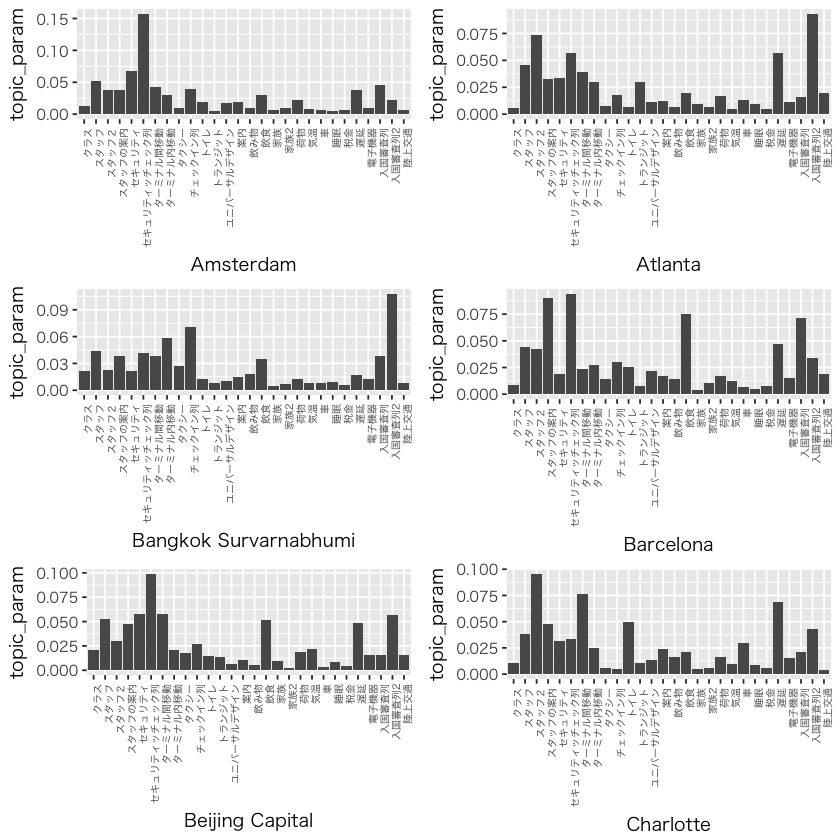

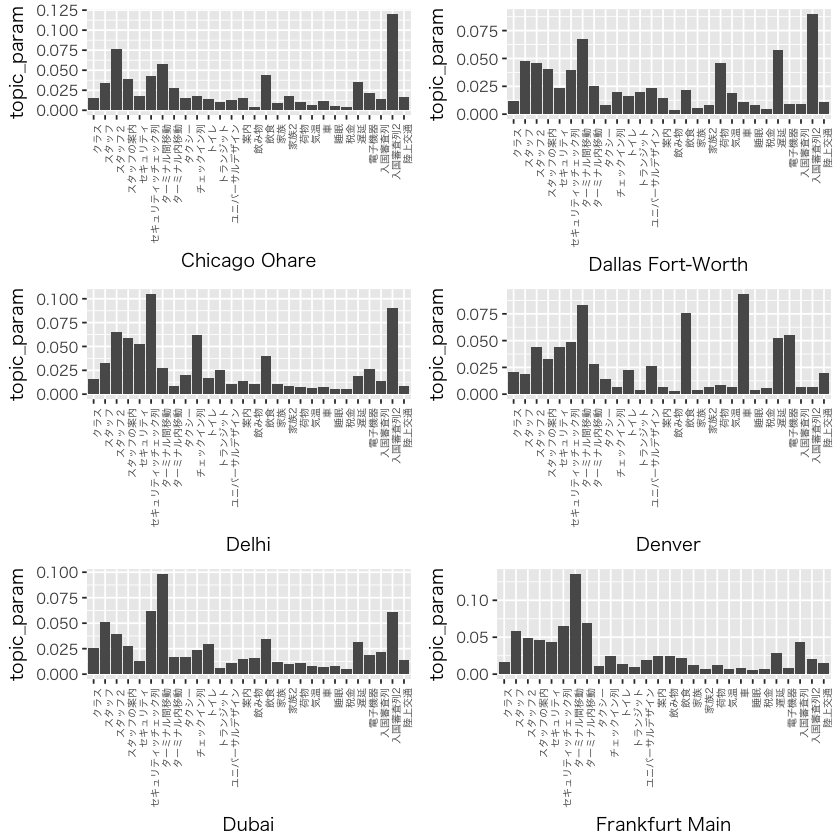

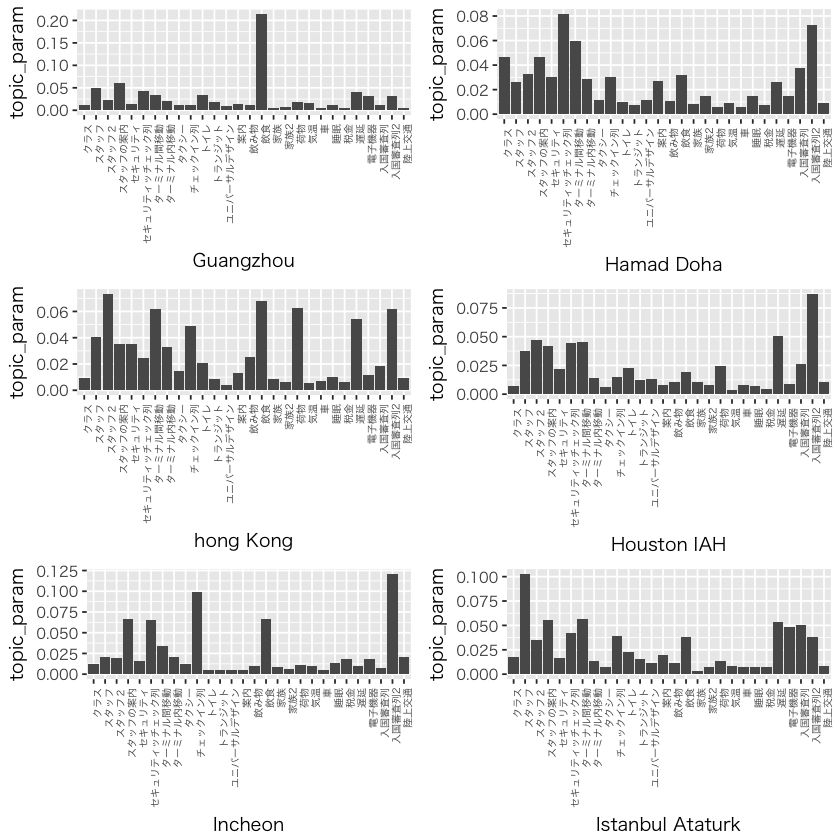

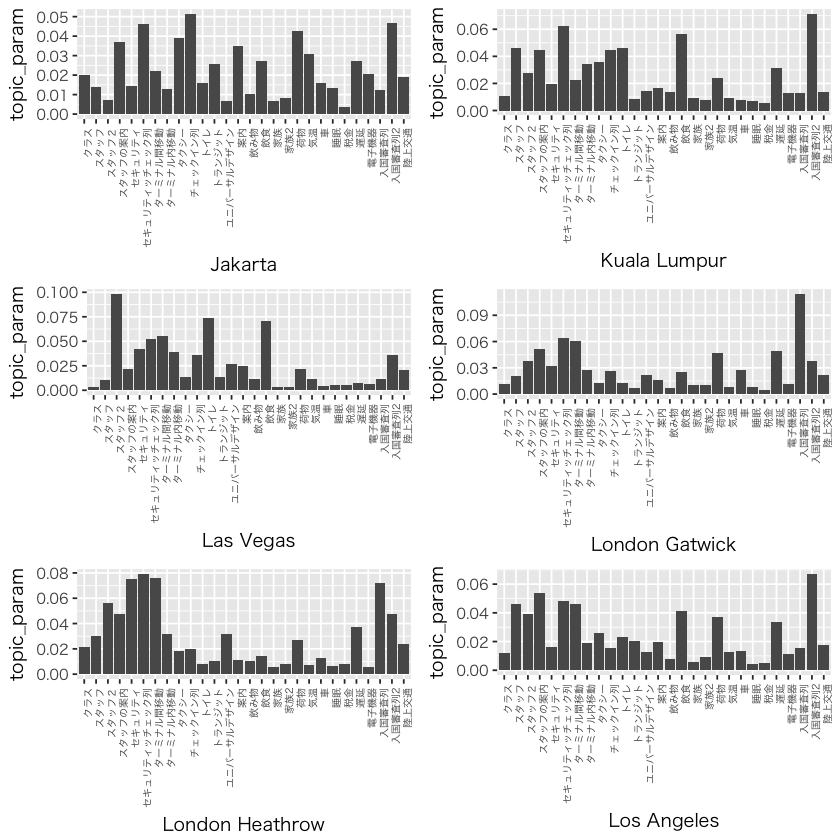

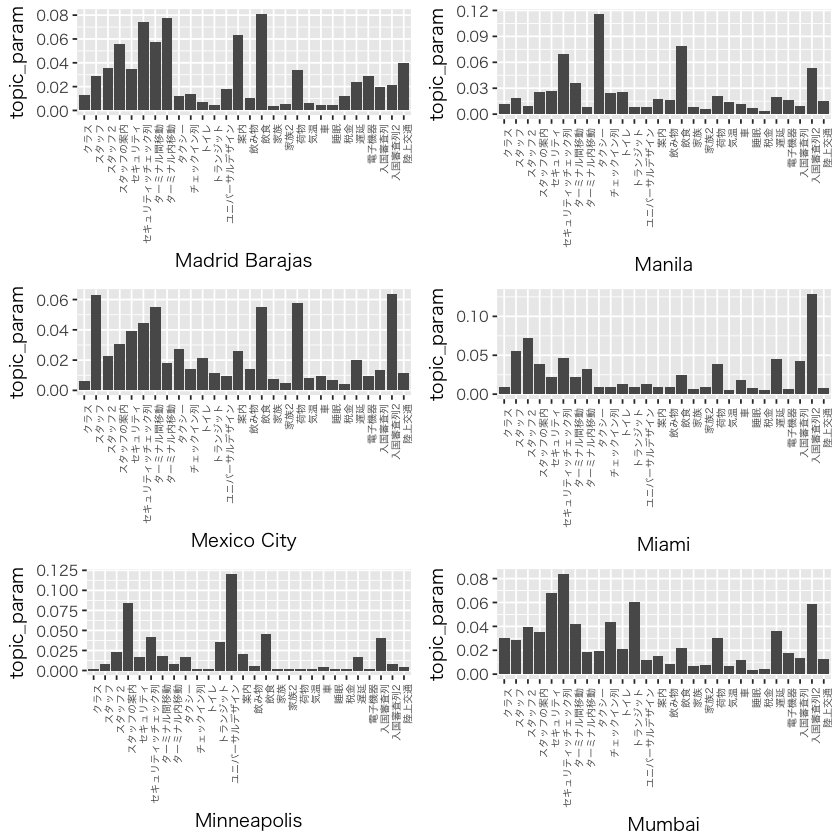

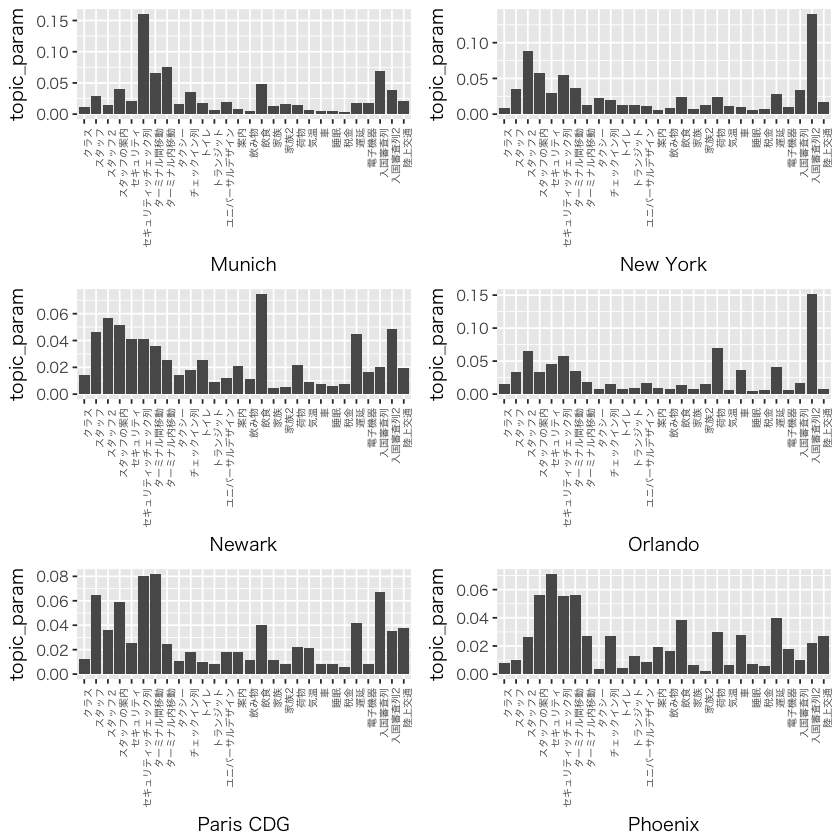

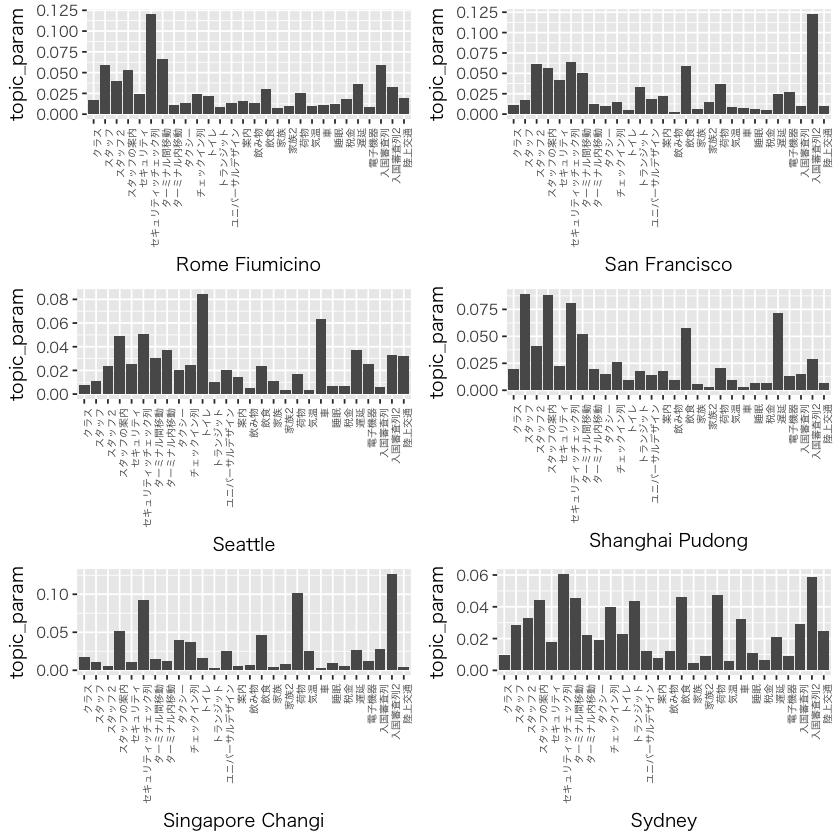

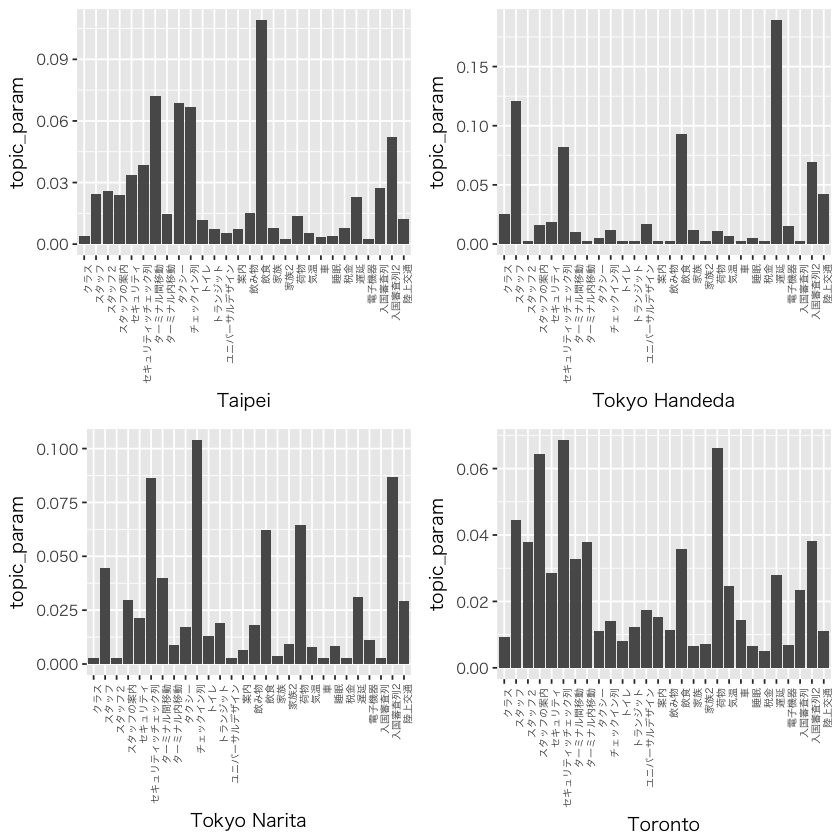

In [55]:
layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[1]],
             topic_plot[[2]],
             topic_plot[[3]],
             topic_plot[[4]],
             topic_plot[[5]],
             topic_plot[[6]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[7]],
             topic_plot[[8]],
             topic_plot[[9]],
             topic_plot[[10]],
             topic_plot[[11]],
             topic_plot[[12]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[13]],
             topic_plot[[14]],
             topic_plot[[15]],
             topic_plot[[16]],
             topic_plot[[17]],
             topic_plot[[18]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[19]],
             topic_plot[[20]],
             topic_plot[[21]],
             topic_plot[[22]],
             topic_plot[[23]],
             topic_plot[[24]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[25]],
             topic_plot[[26]],
             topic_plot[[27]],
             topic_plot[[28]],
             topic_plot[[29]],
             topic_plot[[30]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[31]],
             topic_plot[[32]],
             topic_plot[[33]],
             topic_plot[[34]],
             topic_plot[[35]],
             topic_plot[[36]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[37]],
             topic_plot[[38]],
             topic_plot[[39]],
             topic_plot[[40]],
             topic_plot[[41]],
             topic_plot[[42]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(topic_plot[[43]],
             topic_plot[[44]],
             topic_plot[[45]],
             topic_plot[[46]],
             layout_matrix = layout)

## 特定のトピックに注目

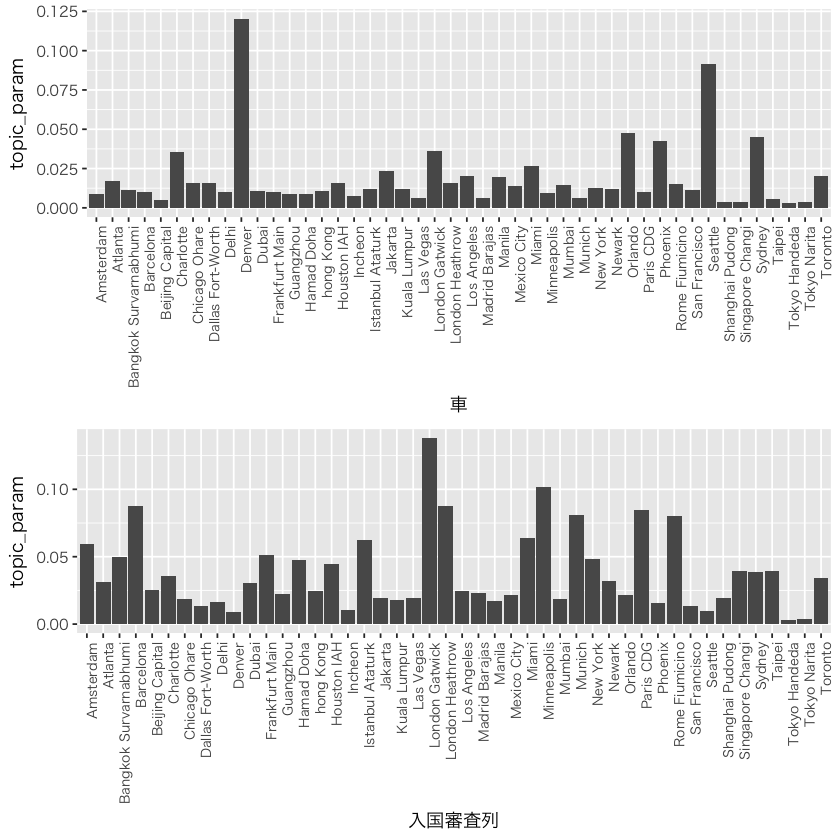

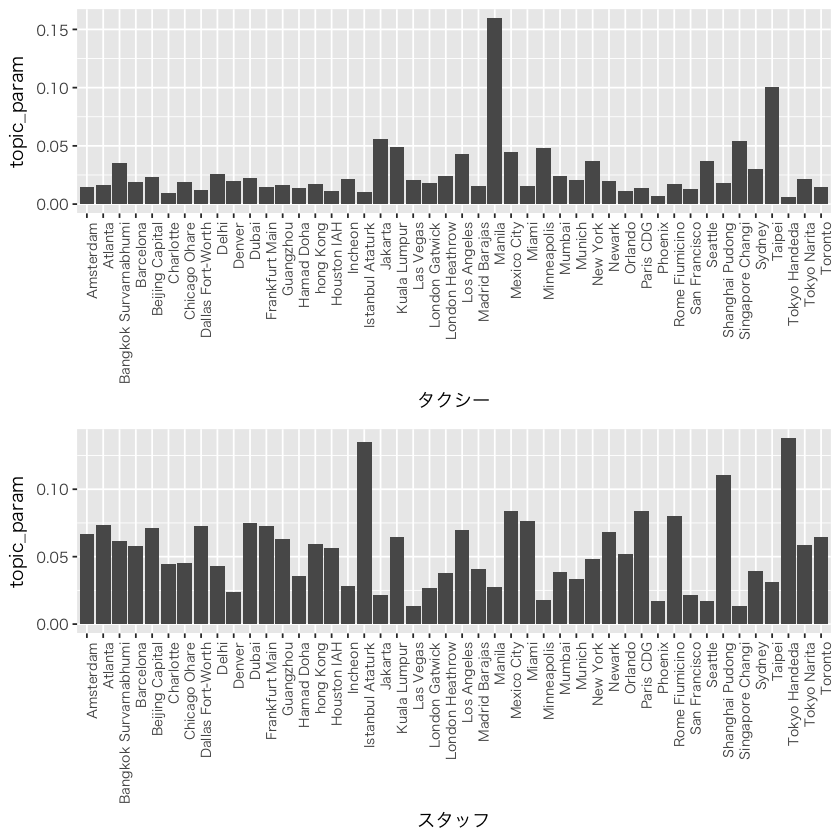

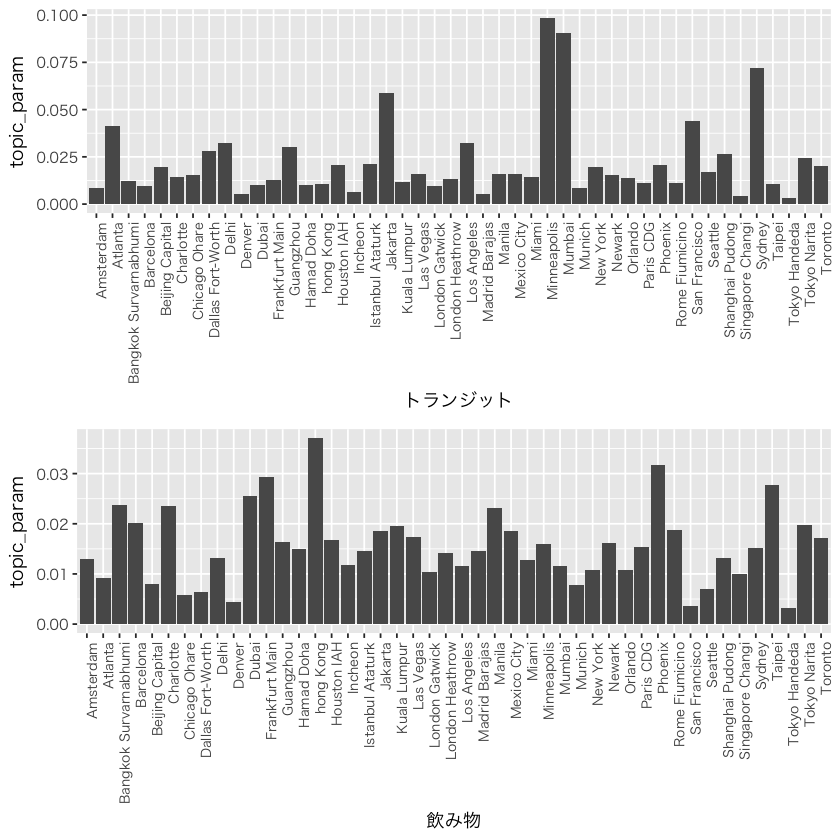

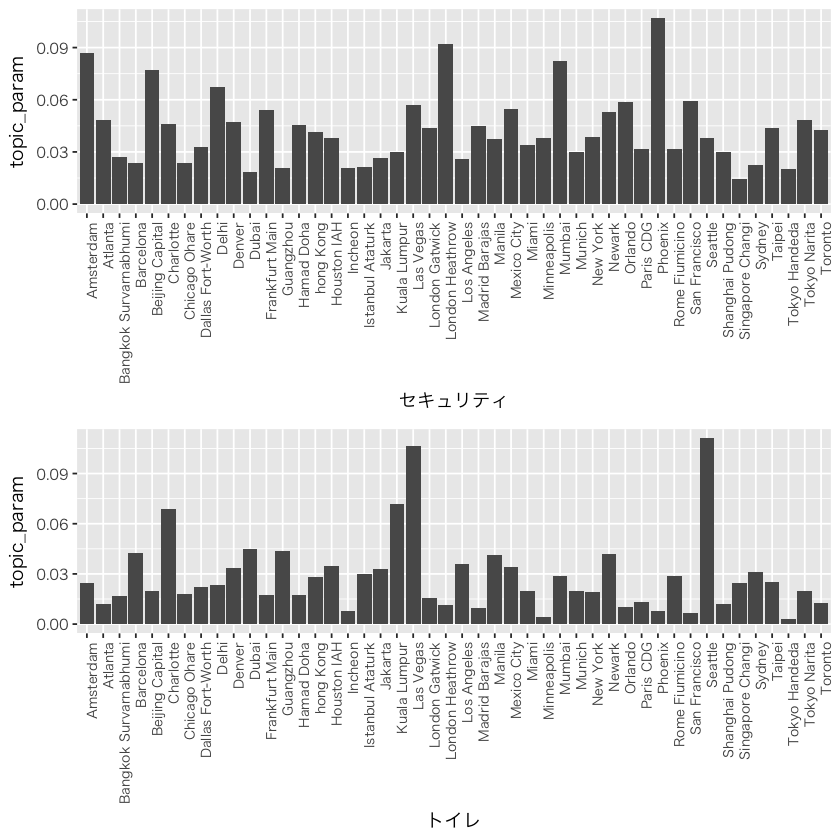

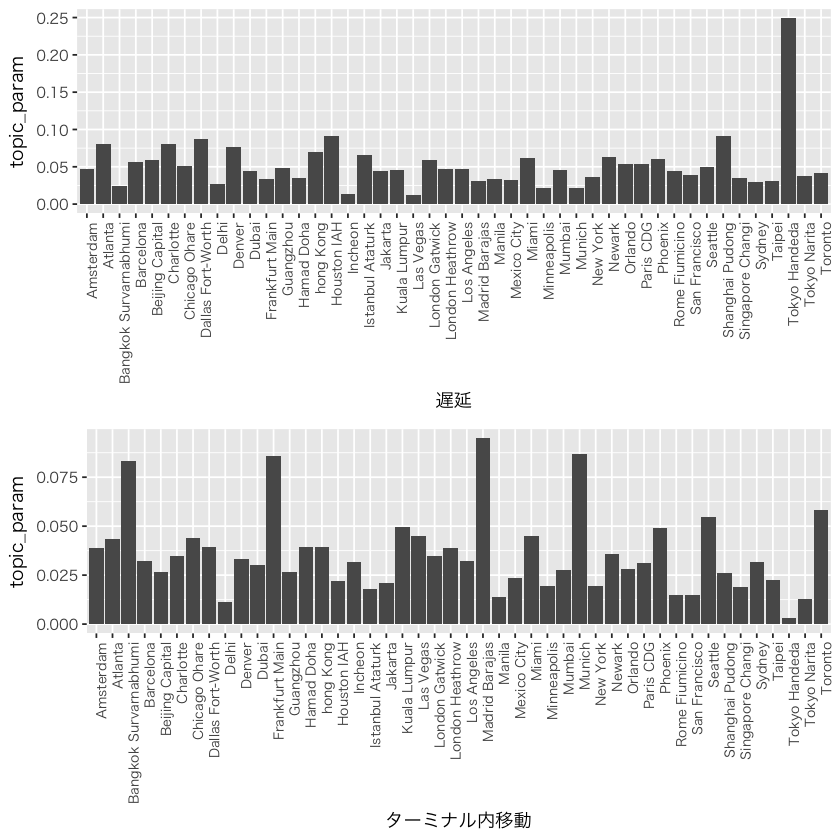

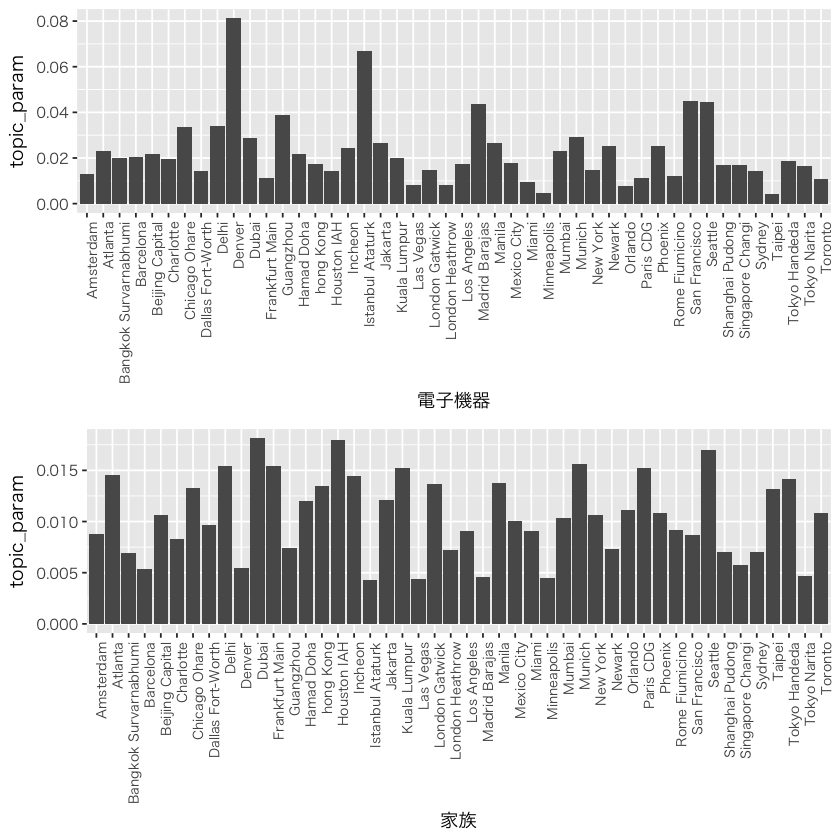

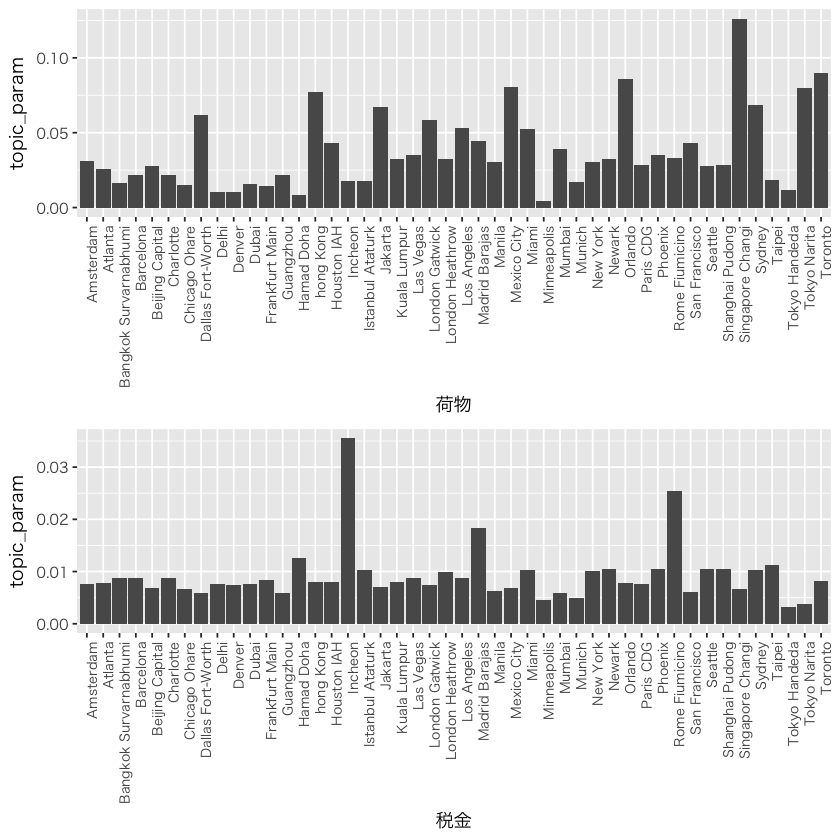

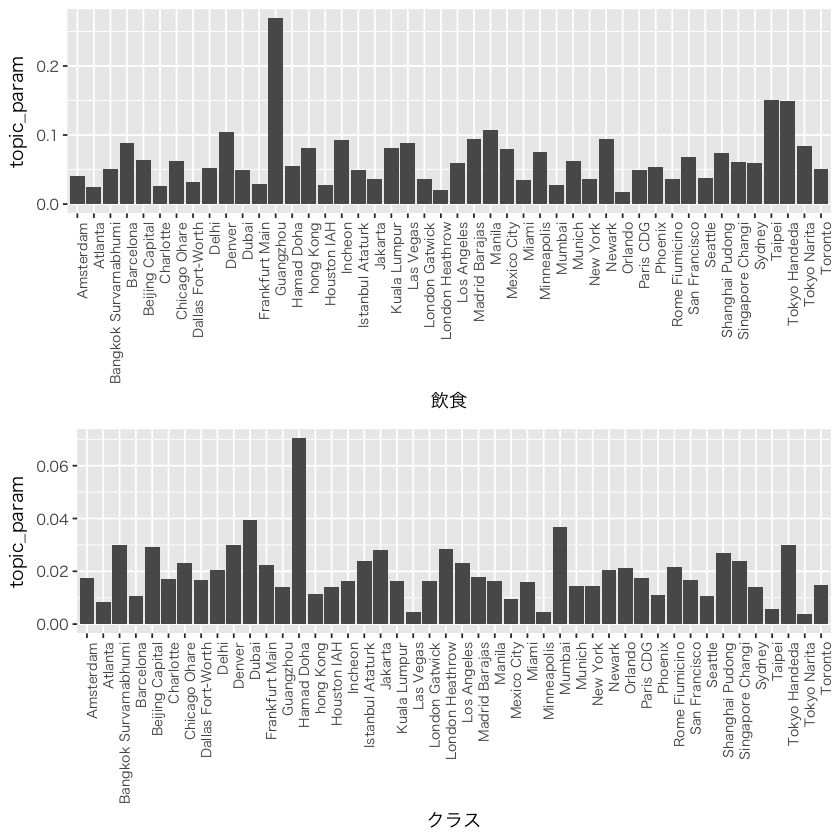

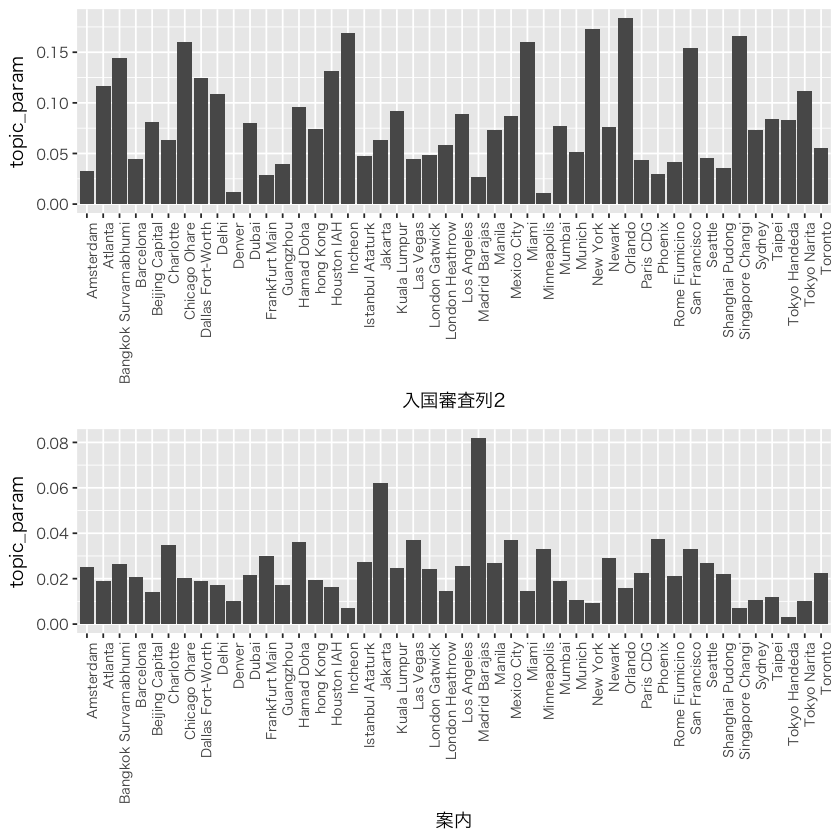

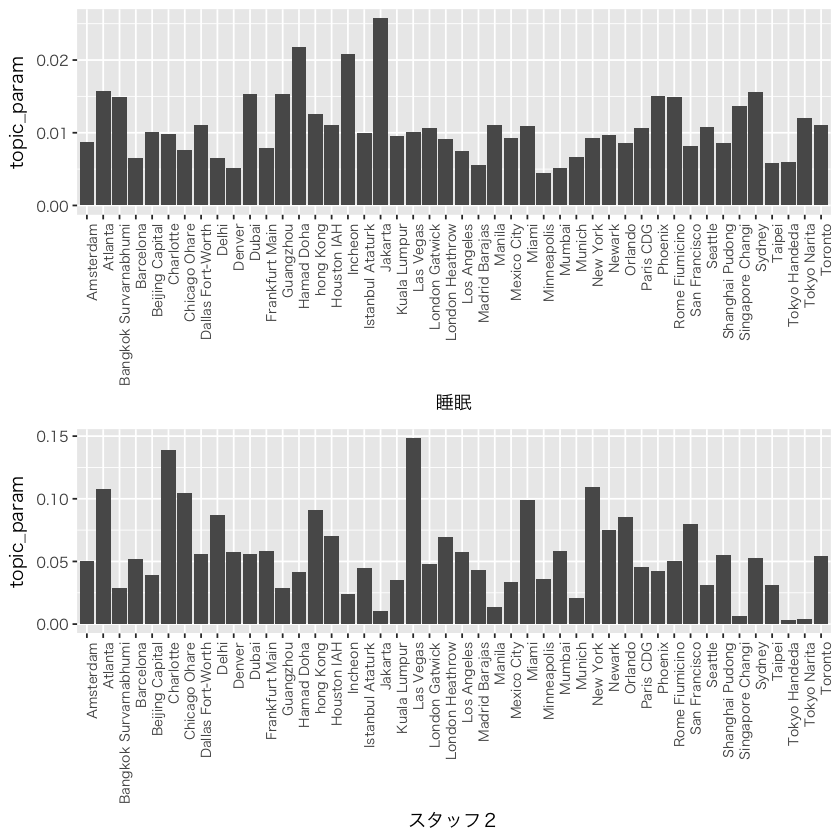

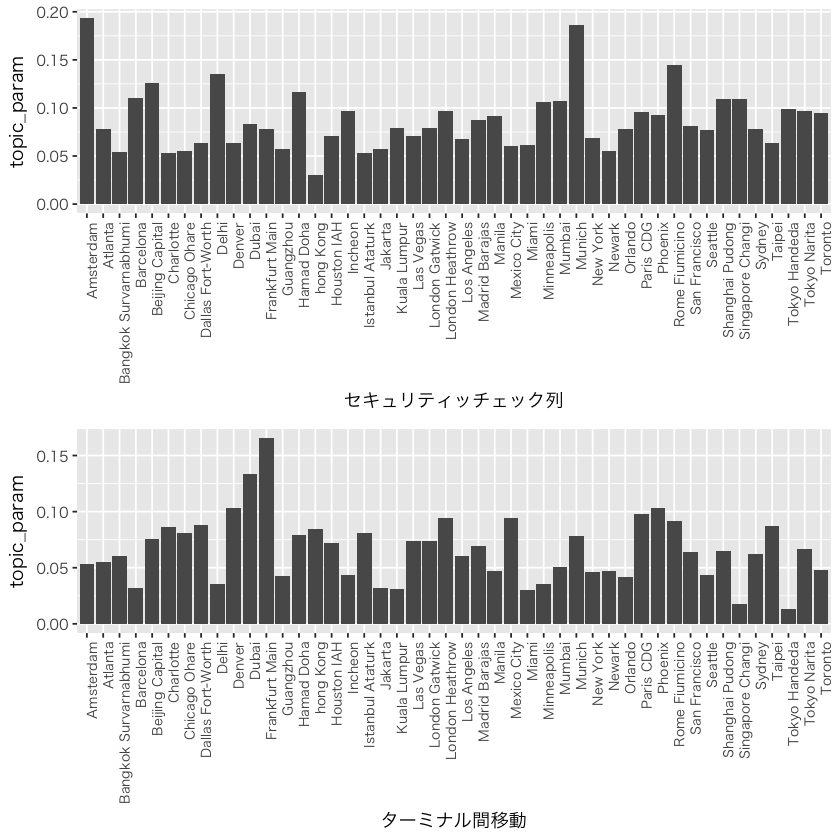

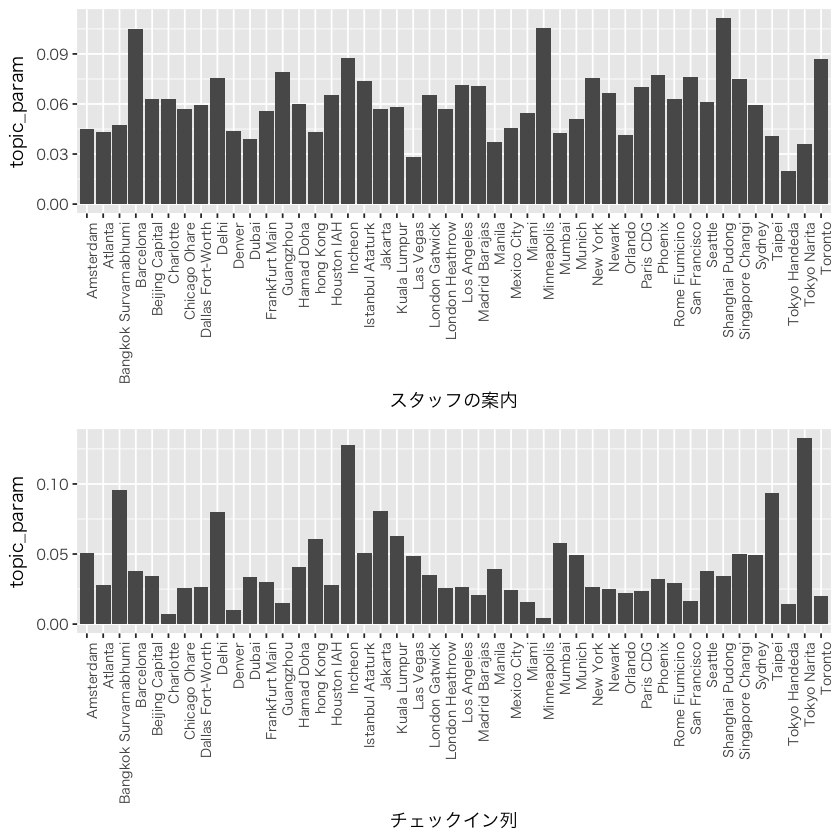

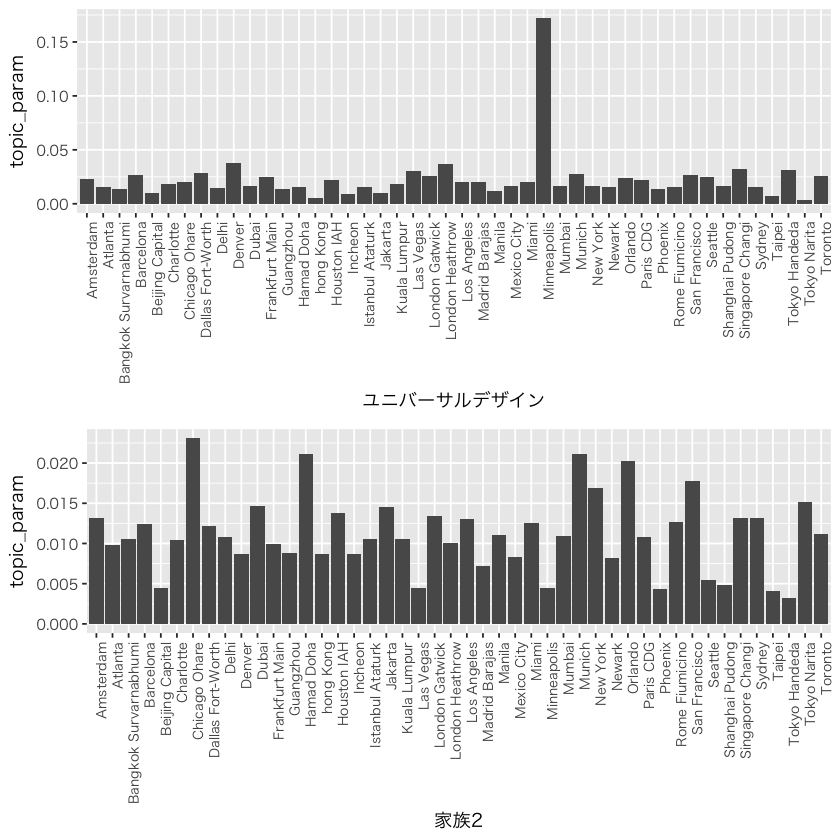

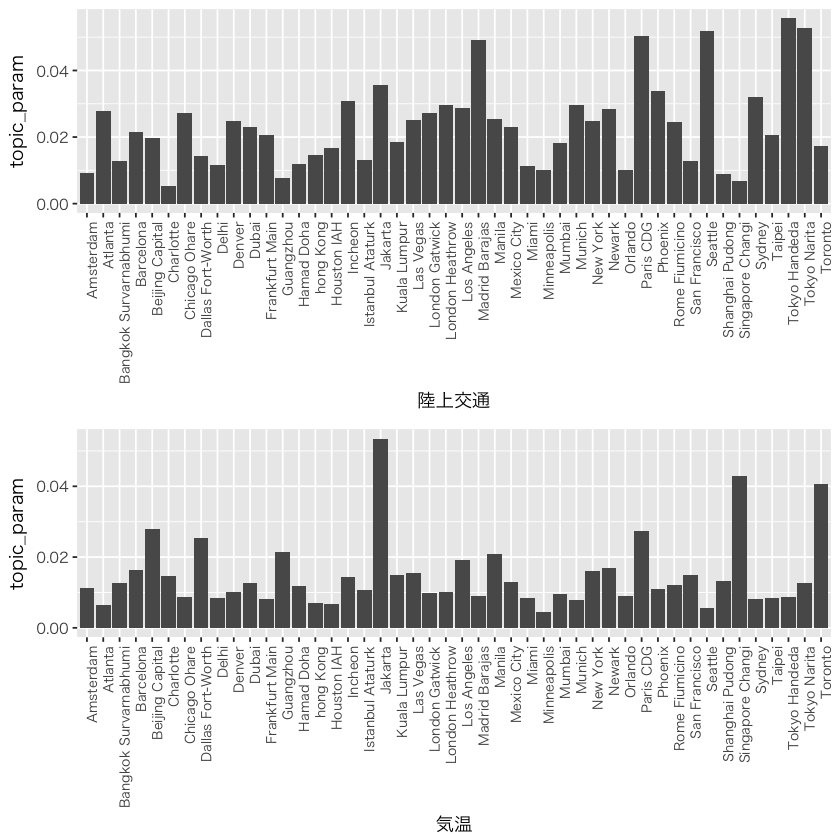

In [232]:
topic_mean_airport <- aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean)
airport_name <- topic_mean_airport[,1]
topic_mean_airport <- topic_mean_airport[,-1]  # １行目は空港名なので除外
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=airport_name, topic_param=as.numeric(topic_mean_airport[,i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_bar(stat = "identity") +
                    labs(x=topic_name[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8))  
}
layout <- rbind(1, 2)
grid.arrange(topic_plot[[1]],
             topic_plot[[2]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[3]],
             topic_plot[[4]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[5]],
             topic_plot[[6]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[7]],
             topic_plot[[8]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[9]],
             topic_plot[[10]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[11]],
             topic_plot[[12]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[13]],
             topic_plot[[14]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[15]],
             topic_plot[[16]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[17]],
             topic_plot[[18]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[19]],
             topic_plot[[20]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[21]],
             topic_plot[[22]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[23]],
             topic_plot[[24]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[25]],
             topic_plot[[26]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[27]],
             topic_plot[[28]],
             layout_matrix = layout)

## トランジットとそうでない場合

#### 全体の傾向

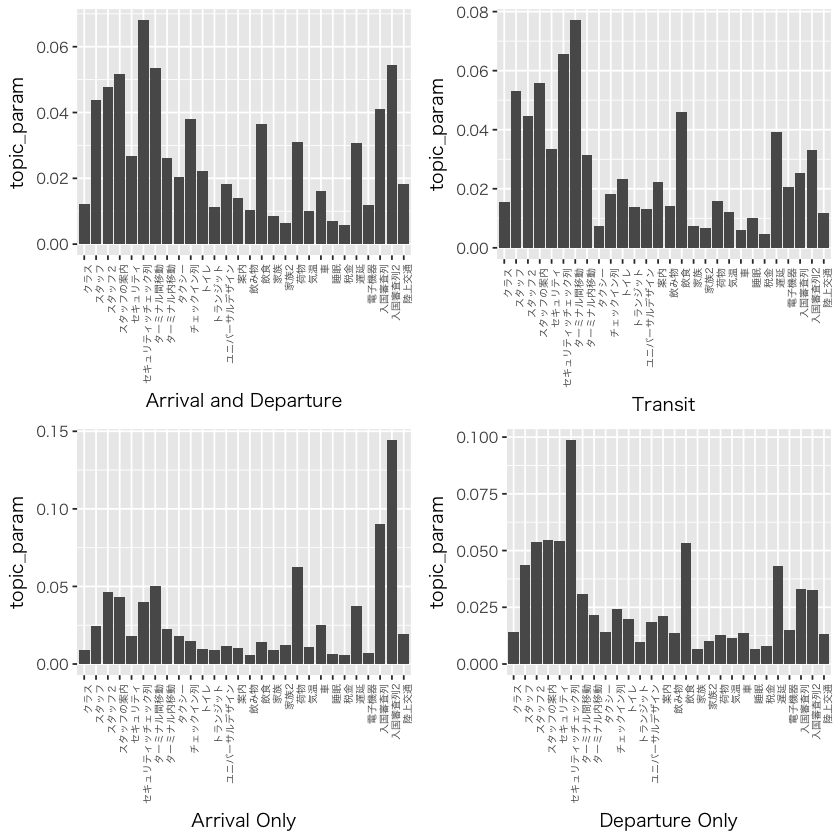

In [144]:
k <- 40
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$Experience.At.Airport), mean))
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
topic_plot <- list()
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=topic_name, topic_param=as.numeric(topic_mean_airport[,i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_bar(stat = "identity") +
                    labs(x=colnames(topic_mean_airport)[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 6))  
}
layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(
             topic_plot[[2]],
             topic_plot[[5]],
             topic_plot[[3]],
             topic_plot[[4]],
             layout_matrix = layout)

#### 待ち列に関するトピック

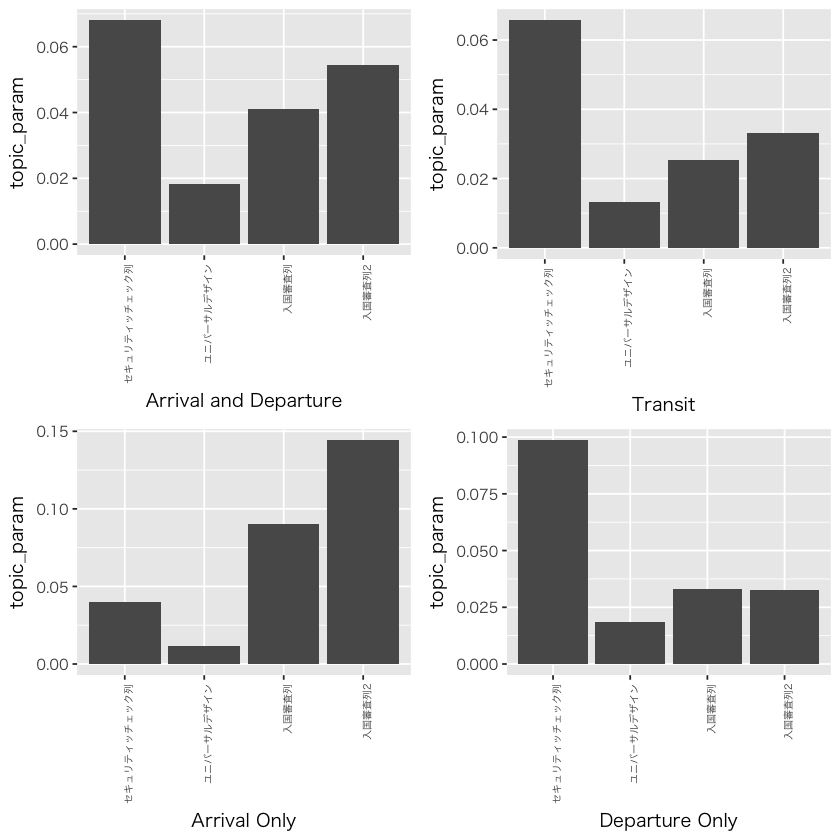

In [145]:
topic_plot <- list()
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=topic_name[c(2, 17, 21, 25)], topic_param=as.numeric(topic_mean_airport[c(2, 17, 21, 25),i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_bar(stat = "identity") +
                    labs(x=colnames(topic_mean_airport)[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 6))  
}
layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(
             topic_plot[[2]],
             topic_plot[[5]],
             topic_plot[[3]],
             topic_plot[[4]],
             layout_matrix = layout)

## 全路線数とトピック確率

#### 全路線数

In [167]:
logit = function(x){
    return (log(1 / (1 - x)))
}

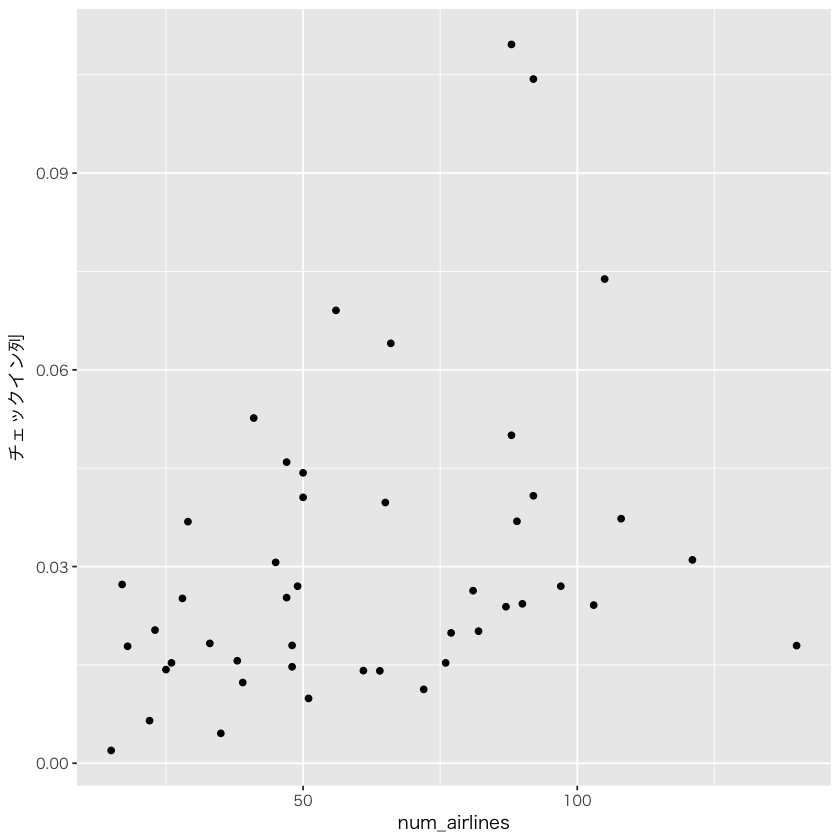

In [169]:
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
tmp <- as.data.frame(t(topic_mean_airport))
tmp$airport_name <- rownames(tmp)
tmp2 <- inner_join(tmp, lcc, by="airport_name")
tmp2$チェックイン列 <- logit(as.numeric(as.vector(tmp2$チェックイン列)))
p <- ggplot(tmp2, aes(x=num_airlines , y=チェックイン列))
p <- p + geom_point()
p <- p + theme_gray(base_family = "HiraKakuPro-W3") 
p

#### lcc割合によるトピック影響

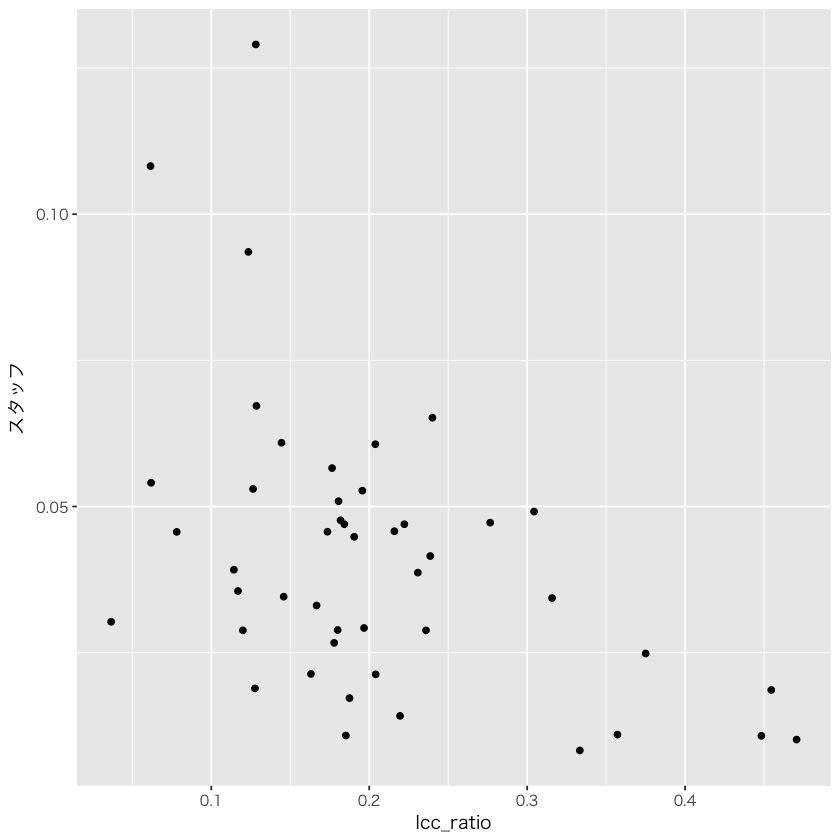

In [170]:
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
tmp <- as.data.frame(t(topic_mean_airport))
tmp$airport_name <- rownames(tmp)
tmp2 <- inner_join(tmp, lcc, by="airport_name")
tmp2$スタッフ <- logit(as.numeric(as.vector(tmp2$スタッフ)))
tmp2$lcc_ratio <- tmp2$num_lcc / tmp2$num_airlines
p <- ggplot(tmp2, aes(x=lcc_ratio , y=スタッフ))
p <- p + geom_point()
p <- p + theme_gray(base_family = "HiraKakuPro-W3") 
p

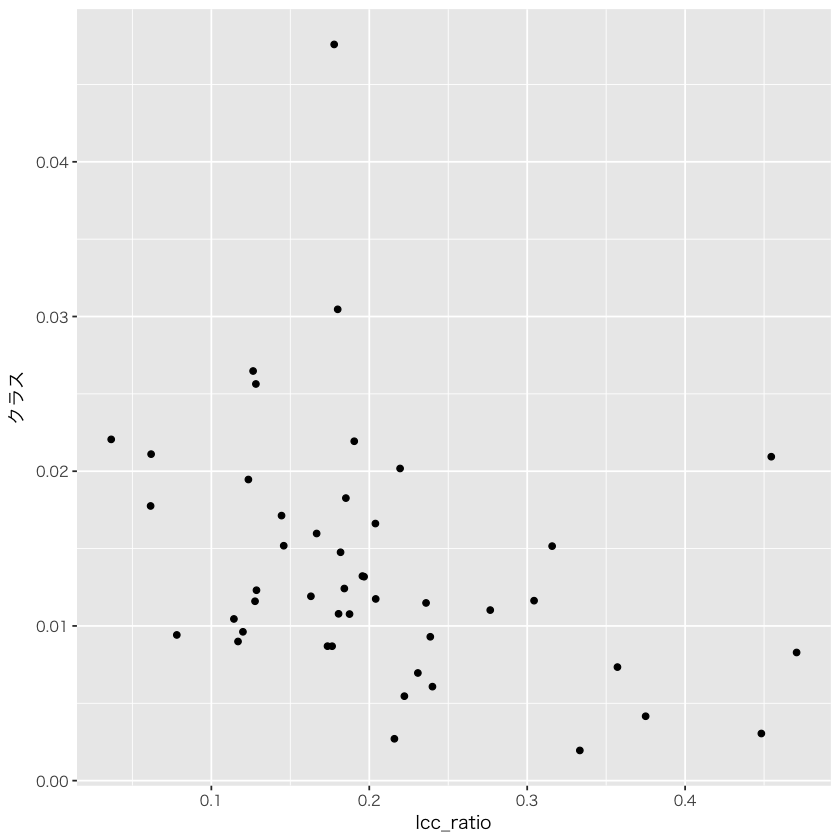

In [172]:
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
tmp <- as.data.frame(t(topic_mean_airport))
tmp$airport_name <- rownames(tmp)
tmp2 <- inner_join(tmp, lcc, by="airport_name")
tmp2$クラス <- logit(as.numeric(as.vector(tmp2$クラス)))
tmp2$lcc_ratio <- tmp2$num_lcc / tmp2$num_airlines
p <- ggplot(tmp2, aes(x=lcc_ratio , y=クラス))
p <- p + geom_point()
p <- p + theme_gray(base_family = "HiraKakuPro-W3") 
p

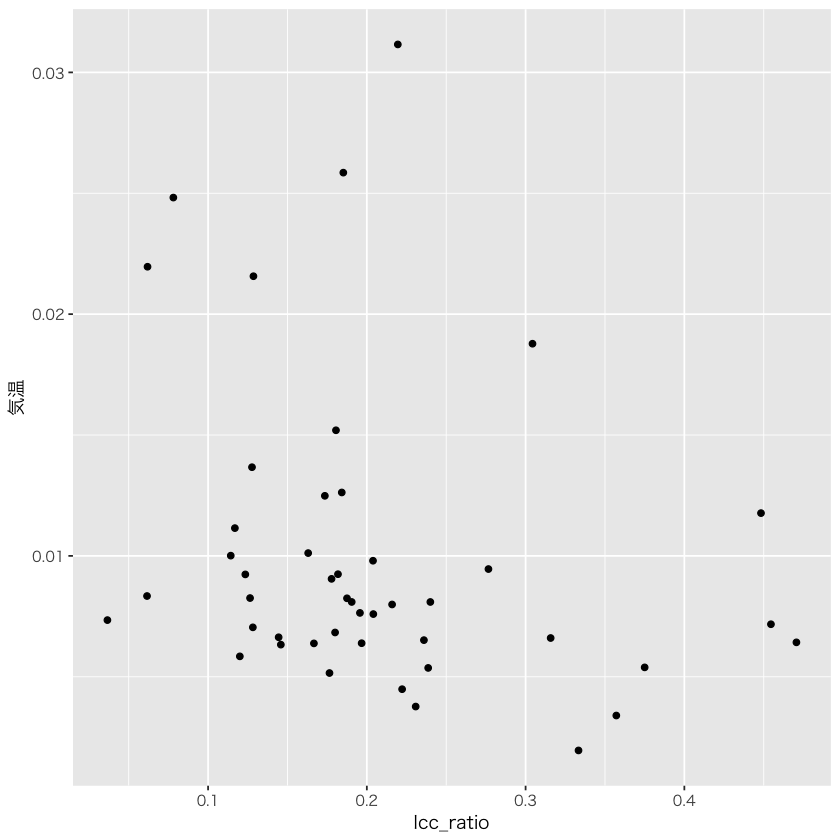

In [173]:
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
tmp <- as.data.frame(t(topic_mean_airport))
tmp$airport_name <- rownames(tmp)
tmp2 <- inner_join(tmp, lcc, by="airport_name")
tmp2$気温 <- logit(as.numeric(as.vector(tmp2$気温)))
tmp2$lcc_ratio <- tmp2$num_lcc / tmp2$num_airlines
p <- ggplot(tmp2, aes(x=lcc_ratio , y=気温))
p <- p + geom_point()
p <- p + theme_gray(base_family = "HiraKakuPro-W3") 
p

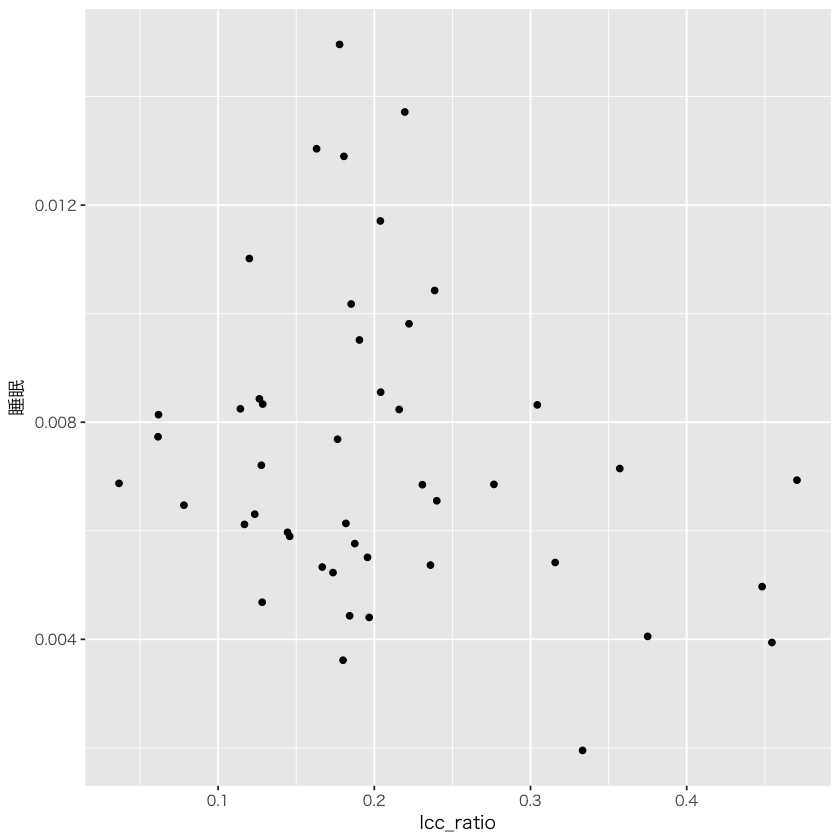

In [174]:
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
tmp <- as.data.frame(t(topic_mean_airport))
tmp$airport_name <- rownames(tmp)
tmp2 <- inner_join(tmp, lcc, by="airport_name")
tmp2$睡眠 <- logit(as.numeric(as.vector(tmp2$睡眠)))
tmp2$lcc_ratio <- tmp2$num_lcc / tmp2$num_airlines
p <- ggplot(tmp2, aes(x=lcc_ratio , y=睡眠))
p <- p + geom_point()
p <- p + theme_gray(base_family = "HiraKakuPro-W3") 
p

## 月ごとのトピック平均

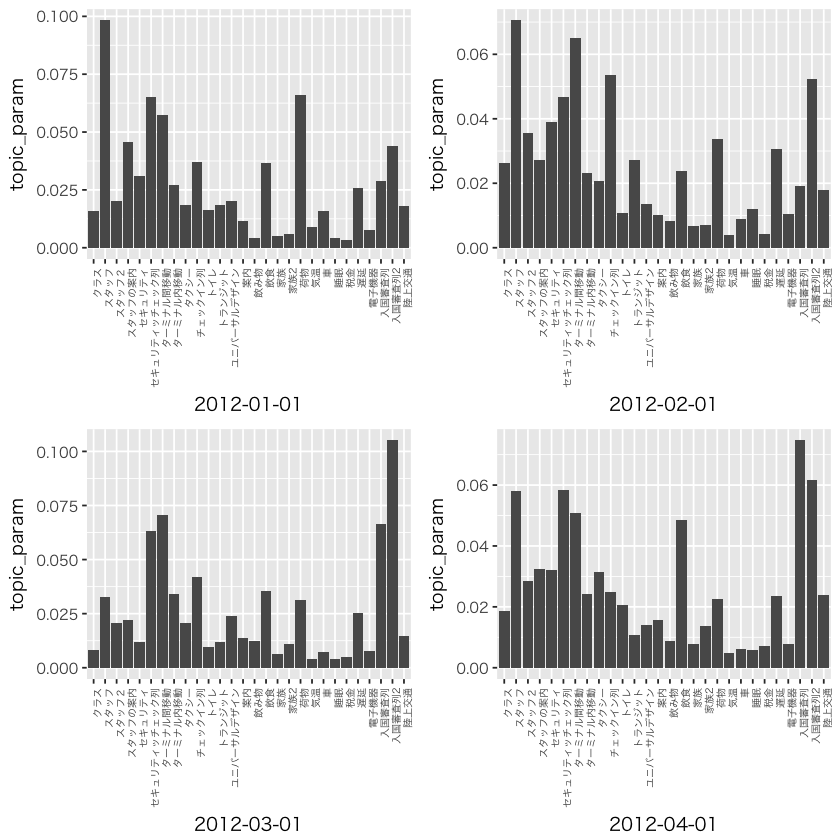

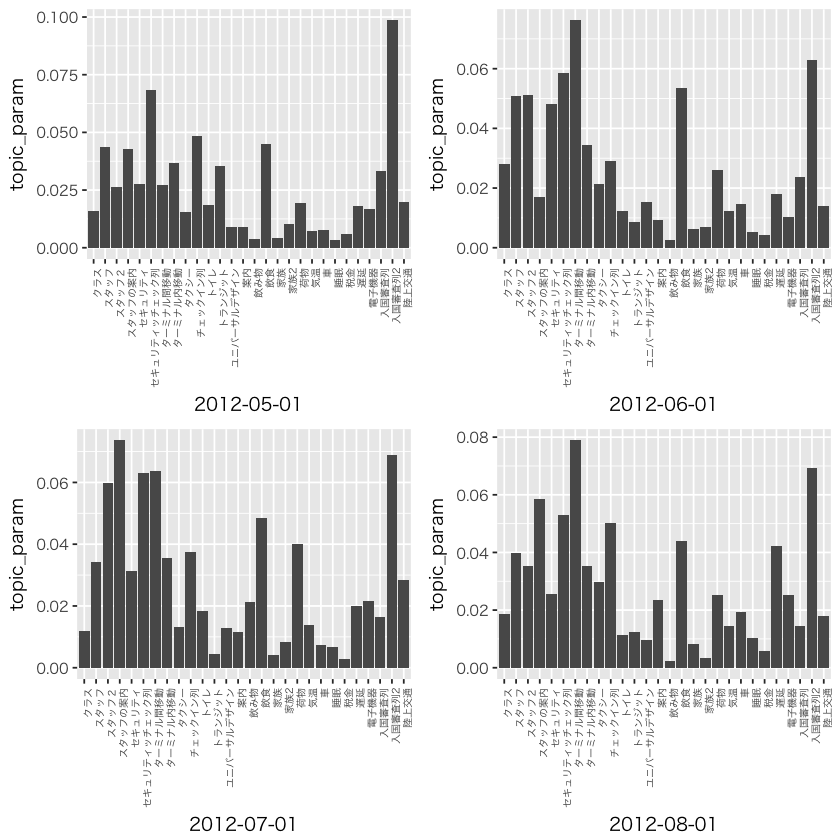

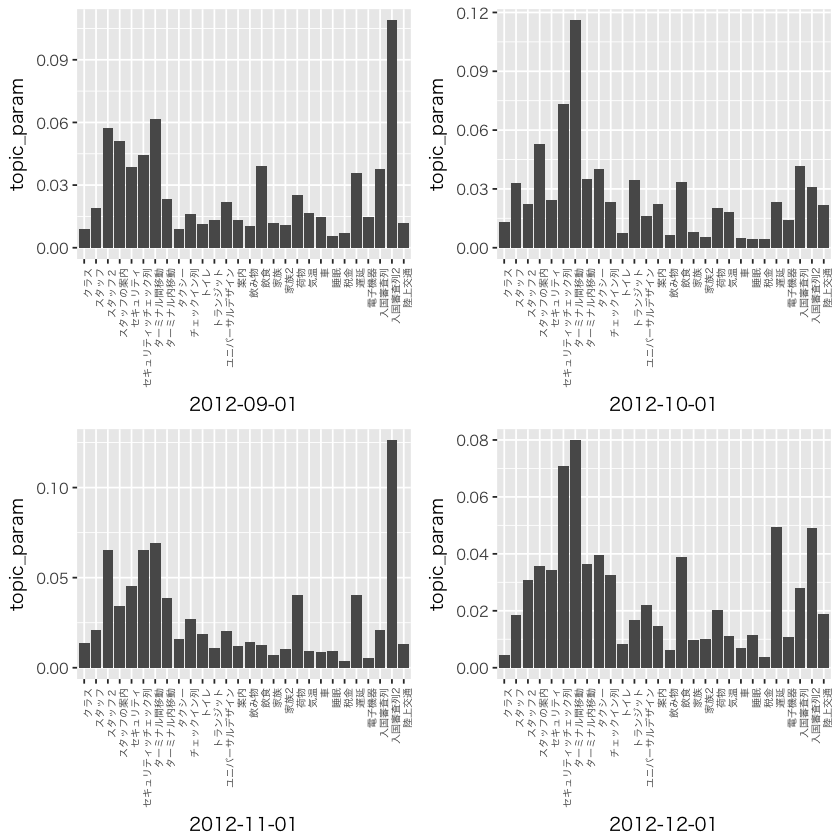

In [111]:
k <- 40
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$month), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
topic_plot <- list()
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=topic_name, topic_param=as.numeric(topic_mean_airport[,i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_bar(stat = "identity") +
                    labs(x=colnames(topic_mean_airport)[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 6))  
}
layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(topic_plot[[1]],
             topic_plot[[2]],
             topic_plot[[3]],
             topic_plot[[4]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(topic_plot[[5]],
             topic_plot[[6]],
             topic_plot[[7]],
             topic_plot[[8]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(topic_plot[[9]],
             topic_plot[[10]],
             topic_plot[[11]],
             topic_plot[[12]],
             layout_matrix = layout)

## 月次プロット

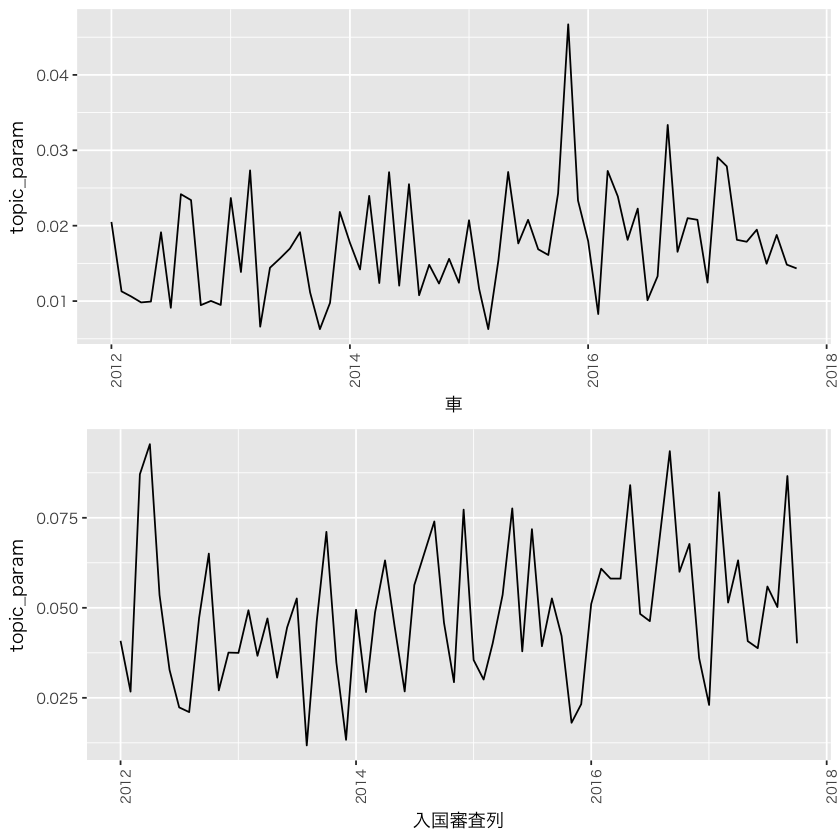

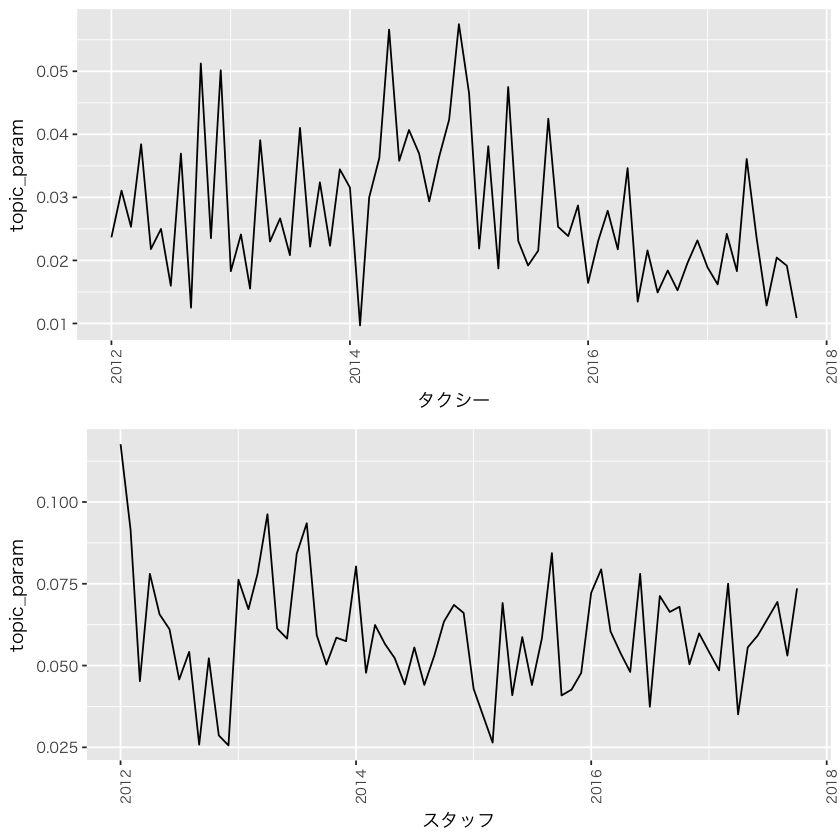

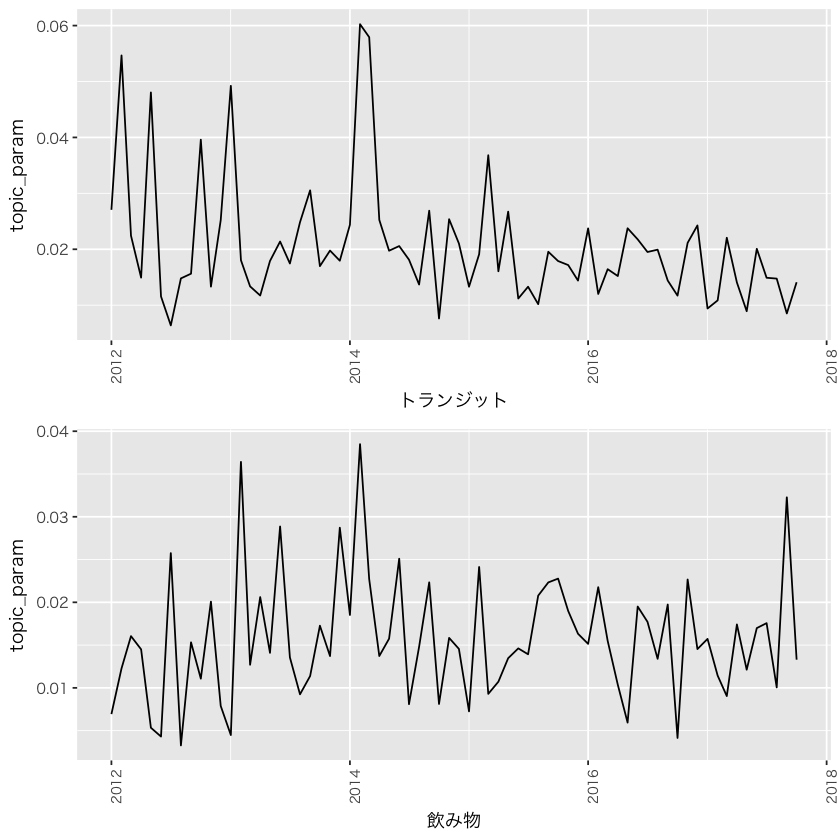

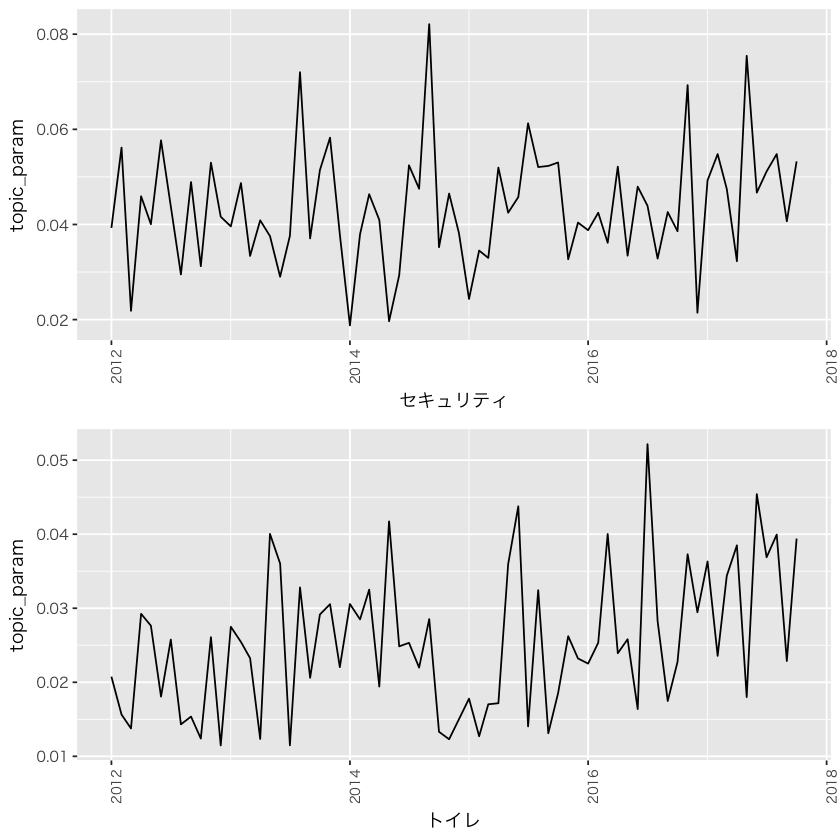

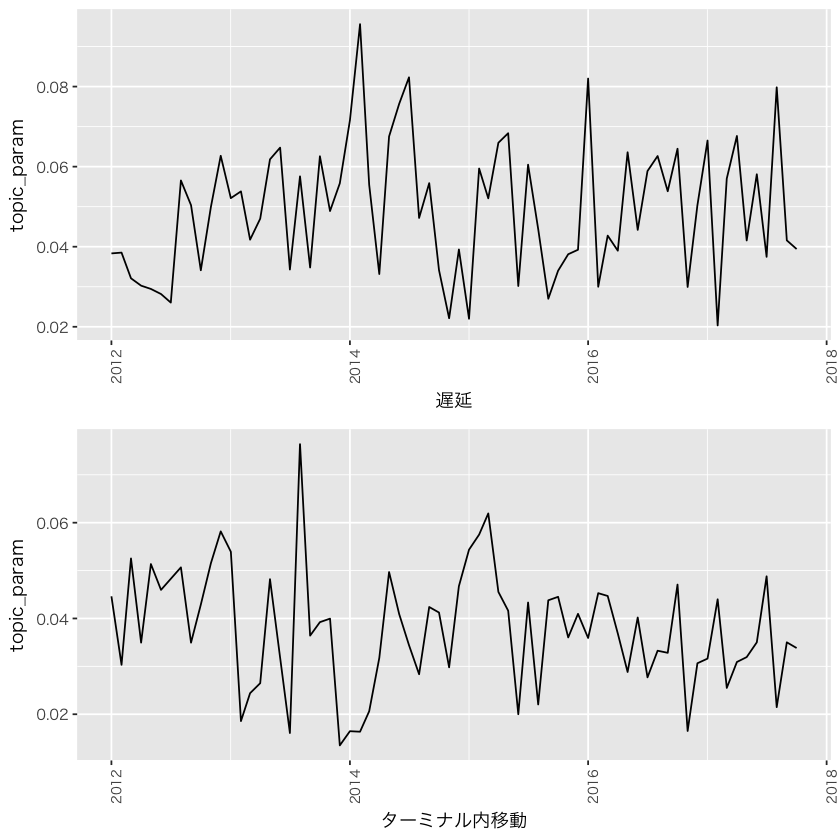

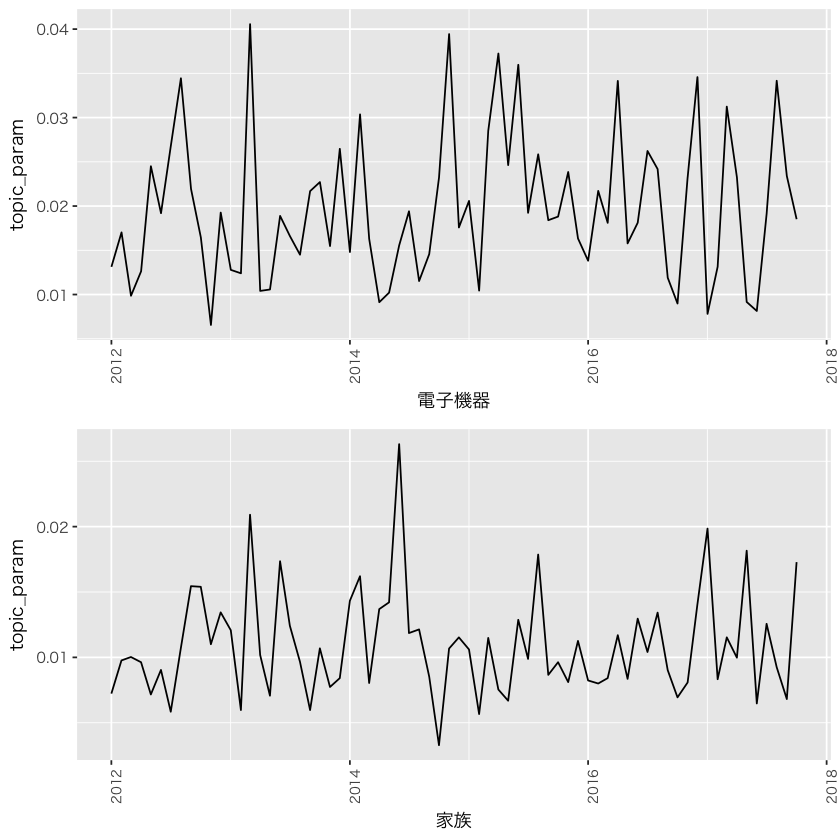

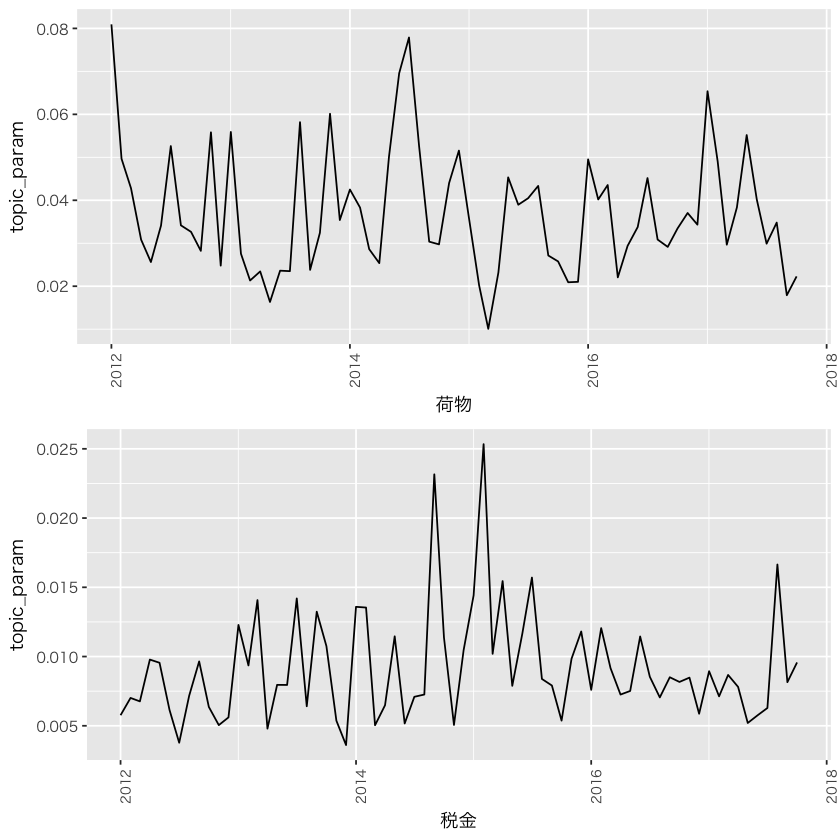

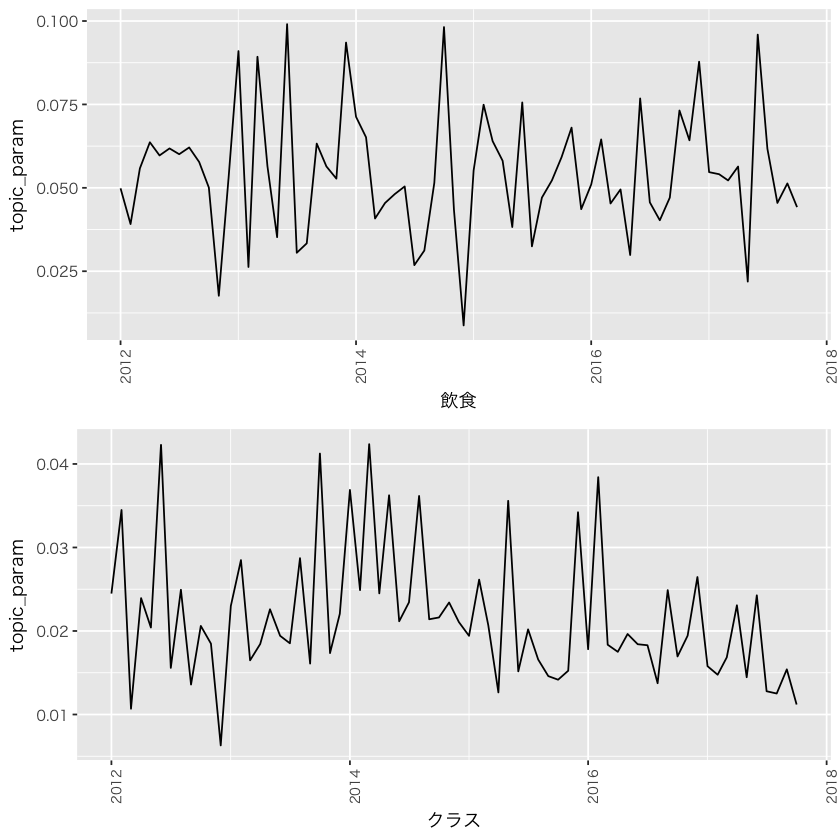

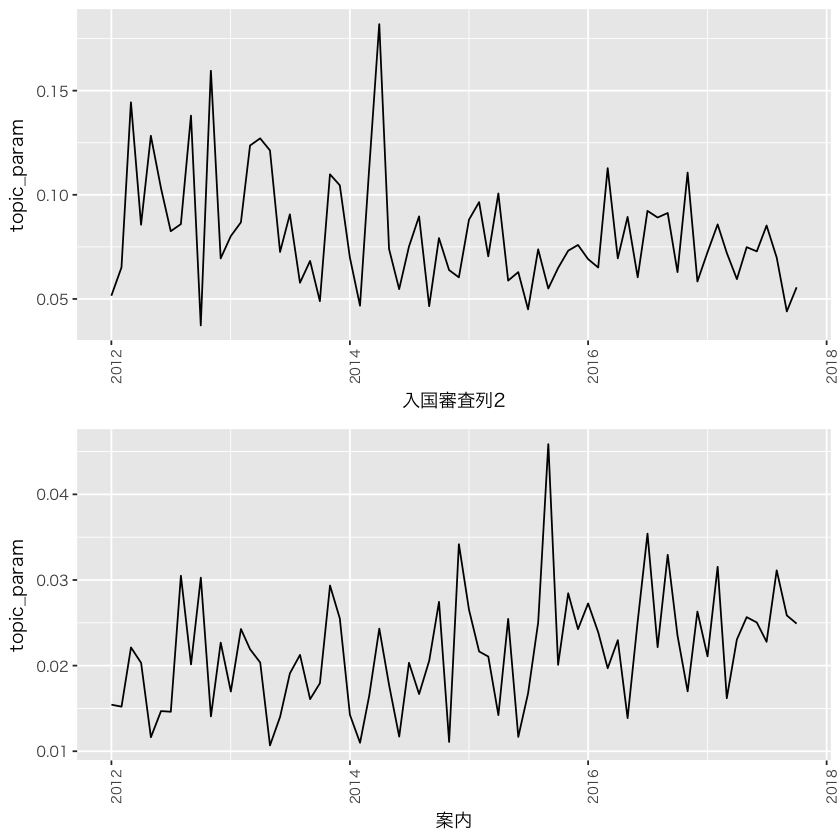

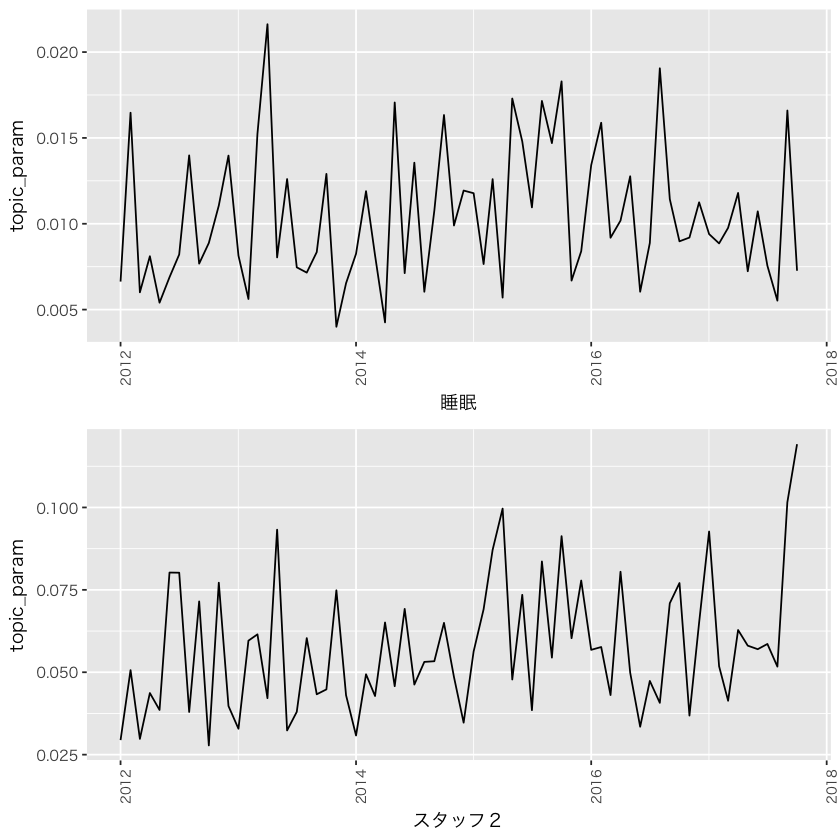

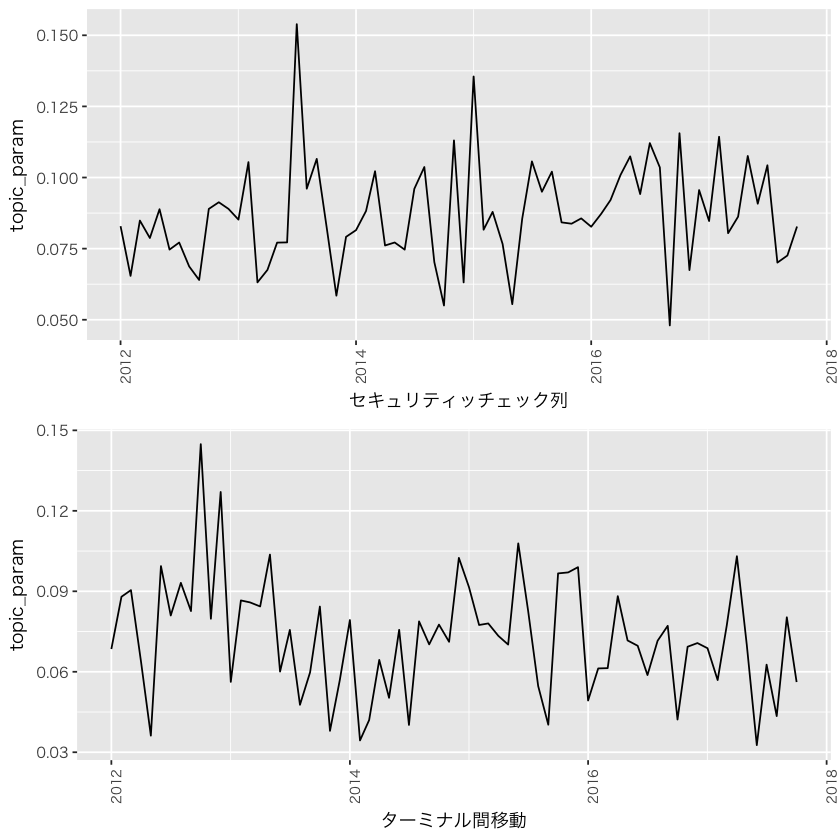

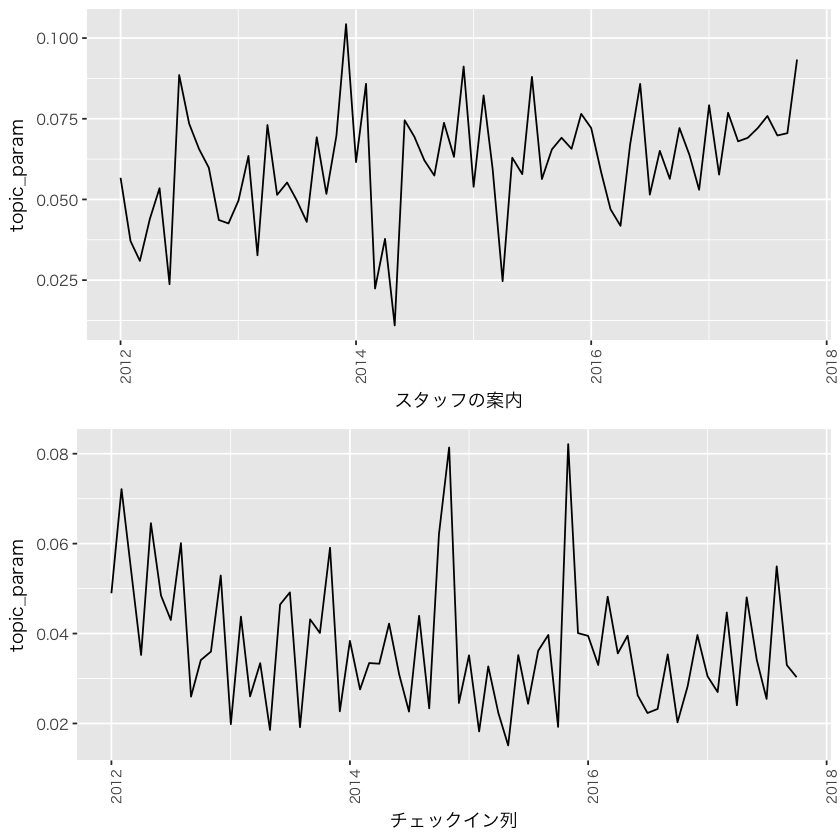

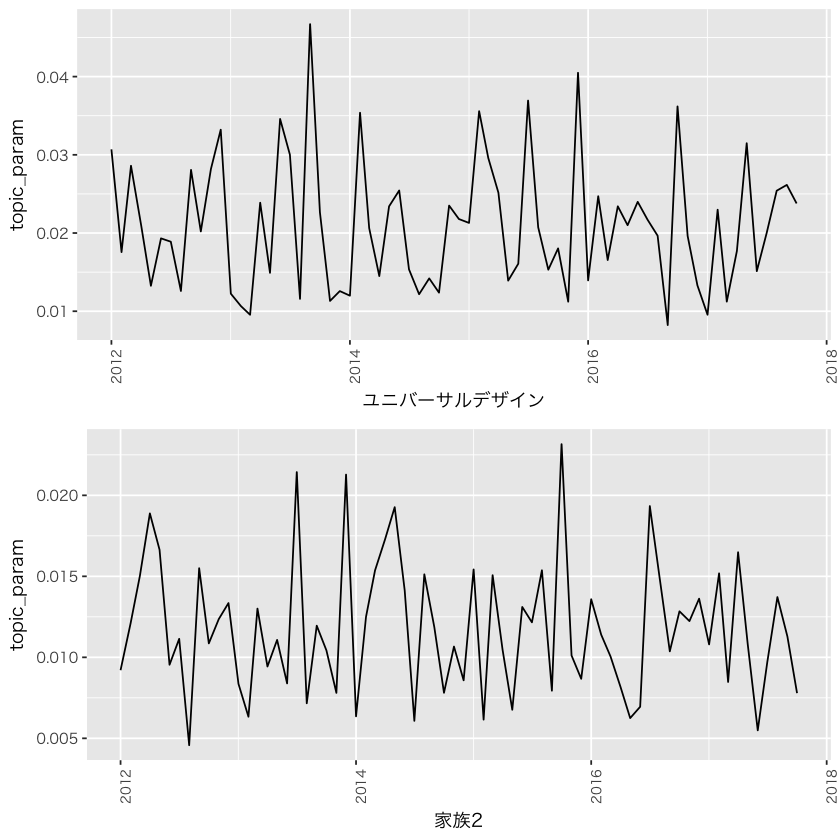

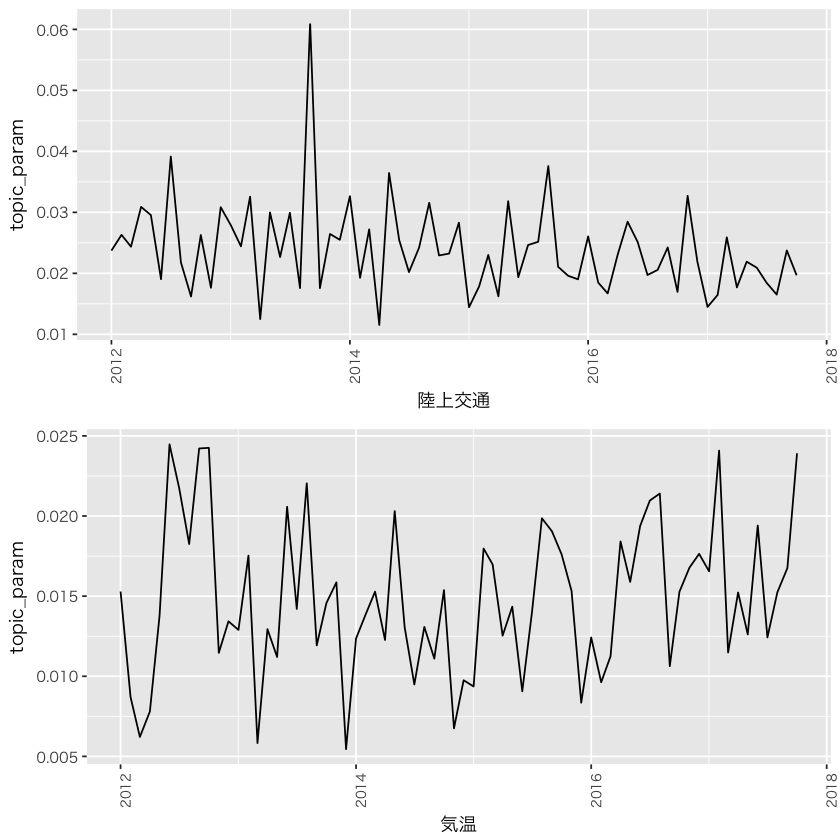

In [264]:
topic_mean_airport <- aggregate(modeled_data[,21:(21 + k - 1)], list(modeled_data$yymm), mean)
airport_name <- topic_mean_airport[,1]
topic_mean_airport <- topic_mean_airport[,-1]  # １行目は空港名なので除外
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=airport_name, topic_param=as.numeric(topic_mean_airport[,i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_line() +
                    labs(x=topic_name[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8))  
}
layout <- rbind(1, 2)
grid.arrange(topic_plot[[1]],
             topic_plot[[2]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[3]],
             topic_plot[[4]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[5]],
             topic_plot[[6]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[7]],
             topic_plot[[8]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[9]],
             topic_plot[[10]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[11]],
             topic_plot[[12]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[13]],
             topic_plot[[14]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[15]],
             topic_plot[[16]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[17]],
             topic_plot[[18]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[19]],
             topic_plot[[20]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[21]],
             topic_plot[[22]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[23]],
             topic_plot[[24]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[25]],
             topic_plot[[26]],
             layout_matrix = layout)

layout <- rbind(1, 2)
grid.arrange(topic_plot[[27]],
             topic_plot[[28]],
             layout_matrix = layout)